In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/veinmahzy/Desktop/Energy Consumption/Dataset/PJME_hourly.csv')
df.index = pd.to_datetime(df['Datetime'])
df.drop(columns='Datetime', inplace = True)
df.head()

PJME_MW
Datetime                    
2002-12-31 01:00:00  26498.0
2002-12-31 02:00:00  25147.0
2002-12-31 03:00:00  24574.0
2002-12-31 04:00:00  24393.0
2002-12-31 05:00:00  24860.0

In [3]:
df.describe
df.columns

Index(['PJME_MW'], dtype='object')

In [4]:
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)

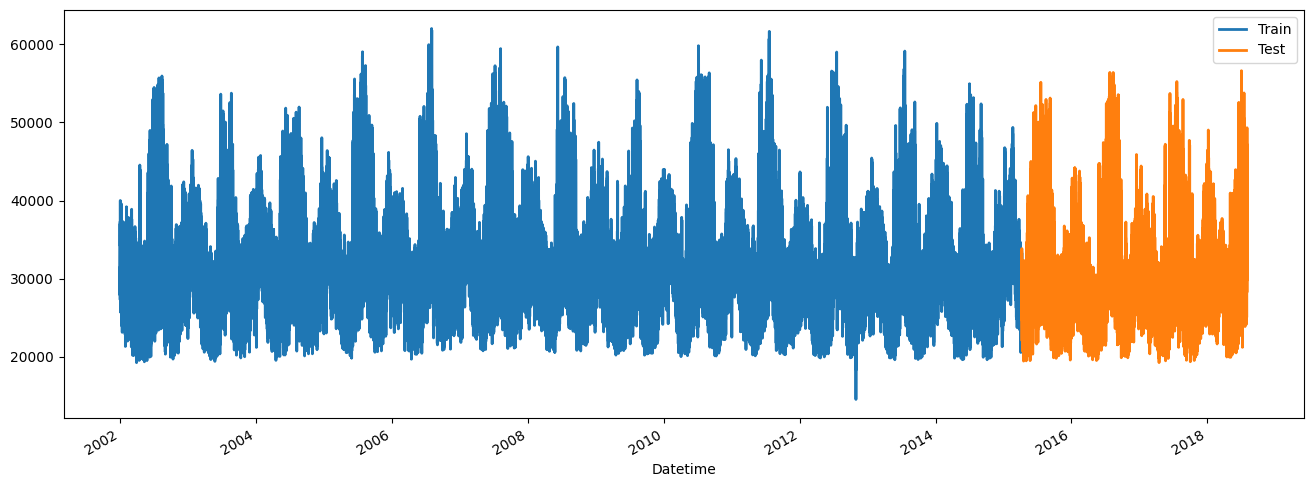

In [5]:
def get_train_test_generic(for_phropet =False, freq = None):
    df = pd.read_csv('/home/veinmahzy/Desktop/Energy Consumption/Dataset/PJME_hourly.csv')
    df.index = pd.to_datetime(df['Datetime'])
    df.drop(columns='Datetime', inplace =True)
    train_df = df.loc[df.index < '01-01-2016']
    test_df = df.loc[df.index >= '01-01-2016']
    if freq is not None :
        train_df = train_df[['PJME_MW']].resample(freq).sum()
        test_df = test_df[['PJME_MW']].resample(freq).sum()
        df = df [['PJME_MW']].resample(freq).sum()

    if for_phropet :
        df = df.reset_index()
        df.columns=['ds','y']
        df.index = df.ds 
        df.index.names =['datetimeIndex']
        train_df = train_df.reset_index()
        train_df.columns = ['ds', 'y']
        train_df.index = train_df.ds 
        train_df.index.names =['datetimeIndex']
        test_df = test_df.reset_index()
        test_df.columns = ['ds', 'y']
        test_df.index = test_df.ds 
        test_df.index.names =['datetimeIndex']

    return train_df, test_df, df

def get_data():
    df = pd.read_csv('/home/veinmahzy/Desktop/Energy Consumption/Dataset/PJME_hourly.csv')
    df.index = pd.to_datetime(df['Datetime'])
    df.drop(columns='Datetime', inplace = True)
    return data 

def convert_to_phropet (df):
    df = df.reset_index()
    df.columns =['ds', 'y']
    df.index = df.ds 
    df.index.names =['datetimeIndex']
    return df

def get_train_test_generic(for_prophet =False, freq = None):
    df = pd.read_csv('/home/veinmahzy/Desktop/Energy Consumption/Dataset/PJME_hourly.csv')
    df.index = pd.to_datetime(df['Datetime'])
    df.drop(columns='Datetime', inplace =True)
    df.sort_index(inplace=True)
    if freq is not None :
        df = df[['PJME_MW']].resample(freq).sum()
    train_len = int(.8*len(df))
    train_df = df.iloc[:train_len].copy()
    test_df = df.iloc[train_len:].copy()


    if for_prophet:
        df = convert_to_phropet(df)
        train_df = convert_to_phropet(train_df)
        test_df = convert_to_phropet(test_df)

    return train_df,test_df, df


tr_df, te_df,df = get_train_test_generic()

from pylab import rcParams
rcParams['figure.figsize'] = 16,6
tr_df['PJME_MW'].plot(label='Train',legend=True, linewidth = 2)
te_df['PJME_MW'].plot(label='Test',legend=True, linewidth = 2)

plt.show()

In [6]:
tr_df, te_df, df = get_train_test_generic()
display(tr_df)
display(te_df)

PJME_MW
Datetime                    
2002-01-01 01:00:00  30393.0
2002-01-01 02:00:00  29265.0
2002-01-01 03:00:00  28357.0
2002-01-01 04:00:00  27899.0
2002-01-01 05:00:00  28057.0
...                      ...
2015-04-09 10:00:00  33082.0
2015-04-09 11:00:00  33285.0
2015-04-09 12:00:00  33148.0
2015-04-09 13:00:00  32809.0
2015-04-09 14:00:00  32613.0

[116292 rows x 1 columns]

PJME_MW
Datetime                    
2015-04-09 15:00:00  32204.0
2015-04-09 16:00:00  32049.0
2015-04-09 17:00:00  32209.0
2015-04-09 18:00:00  32707.0
2015-04-09 19:00:00  33012.0
...                      ...
2018-08-02 20:00:00  44057.0
2018-08-02 21:00:00  43256.0
2018-08-02 22:00:00  41552.0
2018-08-02 23:00:00  38500.0
2018-08-03 00:00:00  35486.0

[29074 rows x 1 columns]

In [7]:
#frequence 1 Day
tr_df, te_df, df = get_train_test_generic(freq='1D')
tr_df.head()

PJME_MW
Datetime            
2002-01-01  714857.0
2002-01-02  822277.0
2002-01-03  828285.0
2002-01-04  809171.0
2002-01-05  729723.0

In [8]:
#frequence 
tr_df, te_df, df = get_train_test_generic(for_prophet=True, freq=None)
tr_df.head()

ds        y
datetimeIndex                                   
2002-01-01 01:00:00 2002-01-01 01:00:00  30393.0
2002-01-01 02:00:00 2002-01-01 02:00:00  29265.0
2002-01-01 03:00:00 2002-01-01 03:00:00  28357.0
2002-01-01 04:00:00 2002-01-01 04:00:00  27899.0
2002-01-01 05:00:00 2002-01-01 05:00:00  28057.0

DATA UNDERSTANDING

    1. HOURLY ENERGY CONSUMPTION 2002-2018

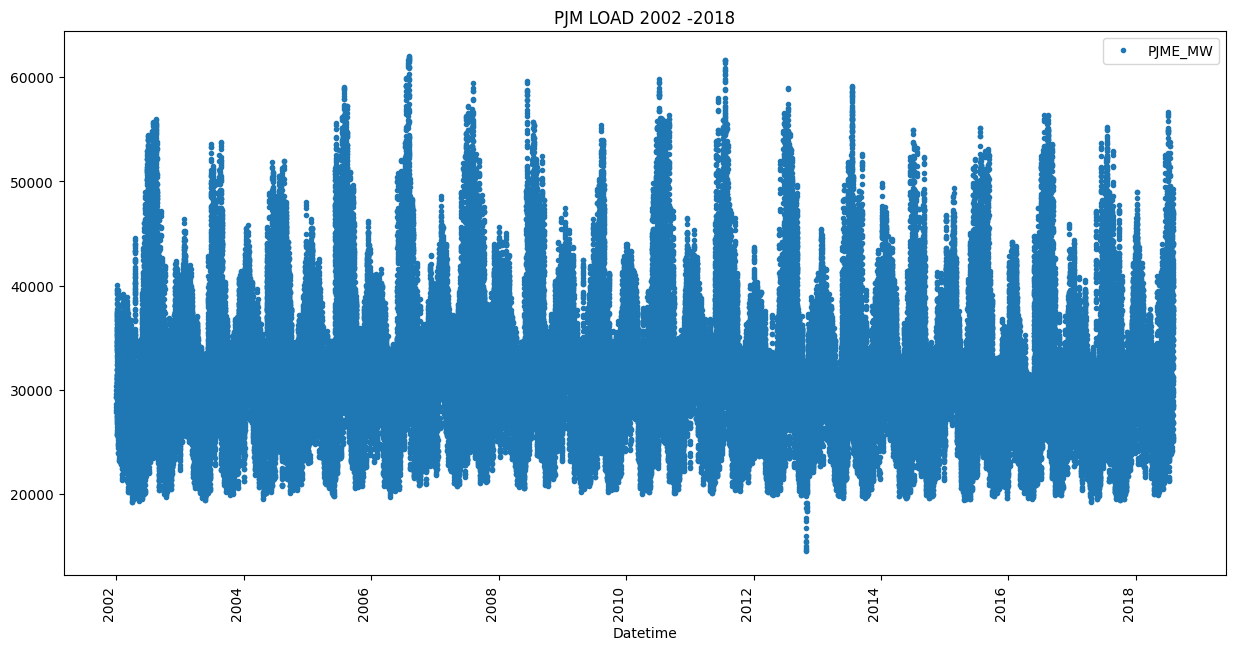

In [9]:
tr_df,te_df, df = get_train_test_generic()
plot = df.plot(style ='.', figsize=(15,8), title='PJM LOAD 2002 -2018', rot=90)

    2. DISTRIBUTION OF ENERGY CONSUMPTION DATA

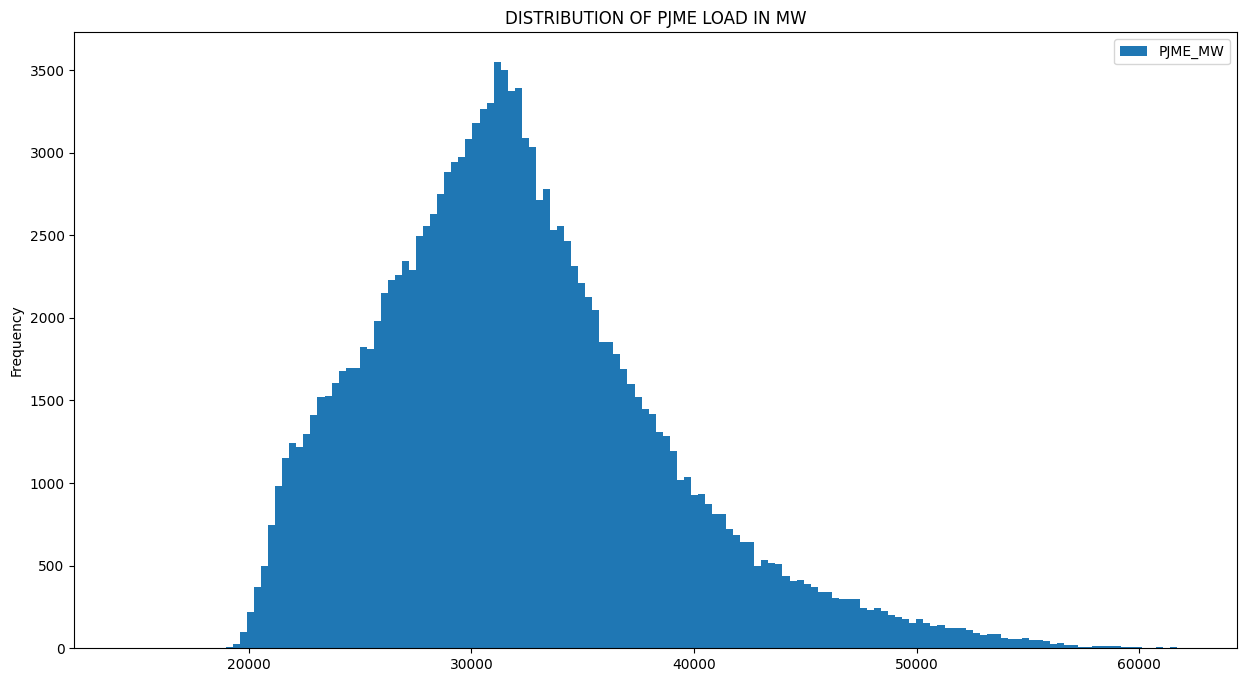

In [10]:
df.plot.hist(figsize=(15,8),bins=150, title= 'DISTRIBUTION OF PJME LOAD IN MW')
plt.show()

    3. ENERGY CONSUMPTION 2015

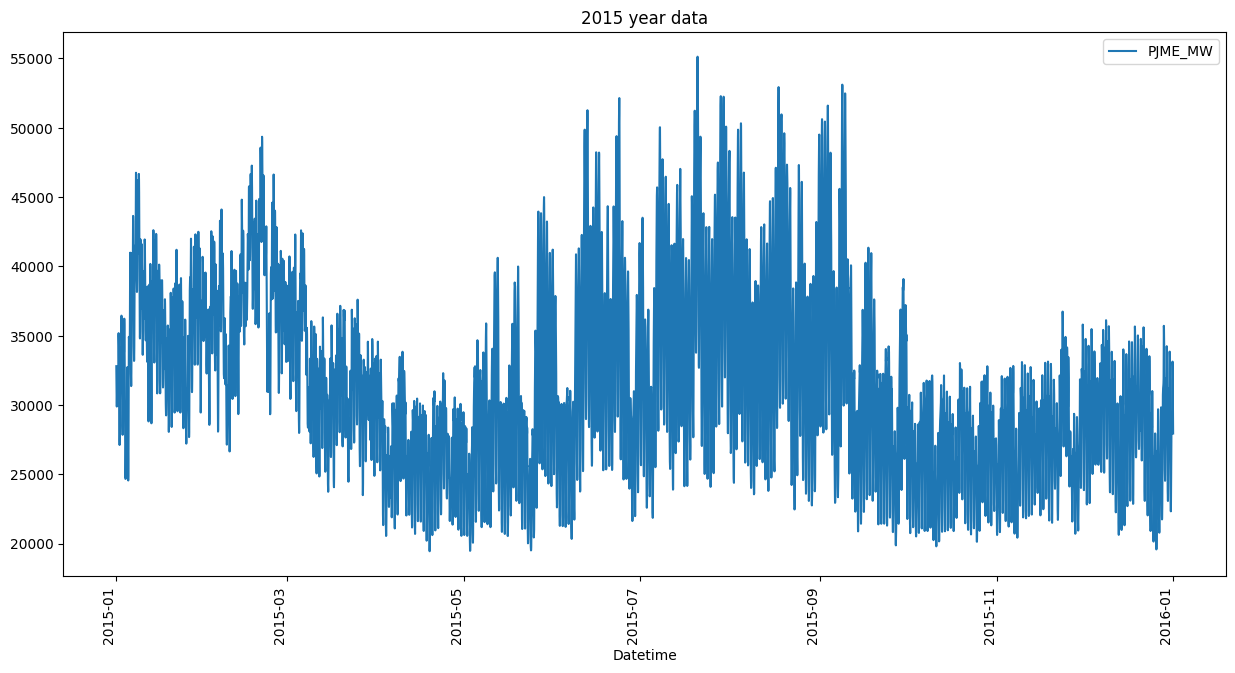

In [11]:
df.loc[df.index.year == 2015].plot(figsize=(15,8), title = '2015 year data', rot = 90)
plt.show()

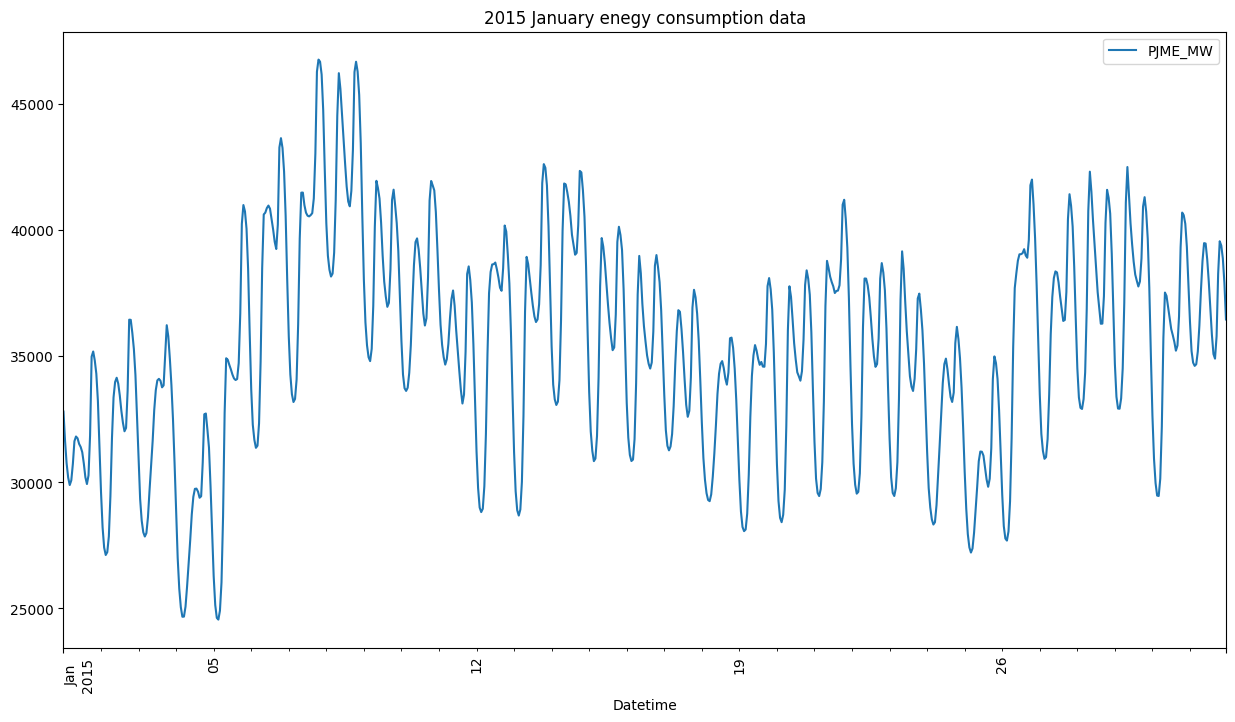

In [12]:
# energy consumption in january 2015 
df.loc[(df.index.year == 2015) & (df.index.month == 1)].plot(figsize =(15,8), title = '2015 January enegy consumption data', rot = 90)
plt.show()

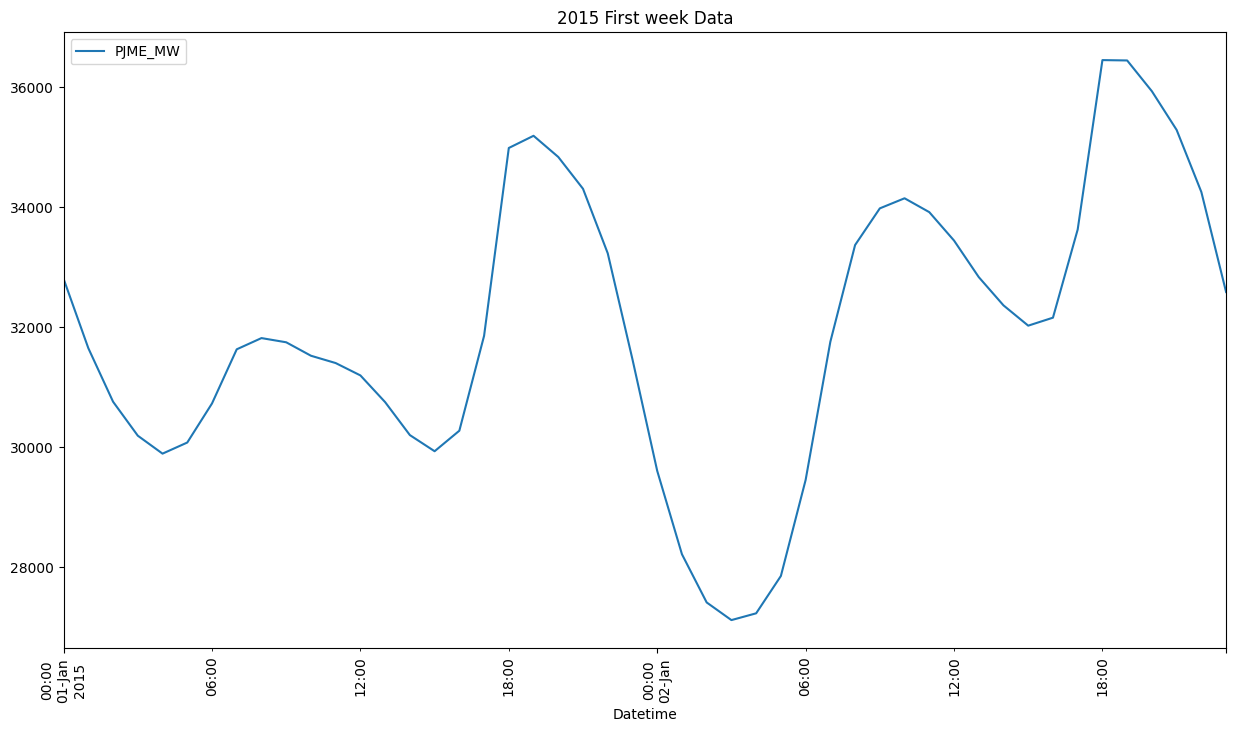

In [13]:
# energy consumption in first week january 2015 
single_week_mask = (df.index.year == 2015) & (df.index.month == 1) & ((df.index.day == 1) | (df.index.day ==2))
df.loc[single_week_mask].plot(figsize=(15,8), title = '2015 First week Data', rot = 90)
plt.show()

HOURLY , WEEKDAY, AND MONTHLY ENERGY CONSUMPTION

In [14]:
df['date']= df.index.date
df['year'] = df.index.year
df['quarter'] = df.index.quarter
df['month']= df.index.month
df['dom']=df.index.day
df['dow']=df.index.dayofweek
df['doy']=df.index.dayofyear
df['weekday']=df.index.day_name()
df['hour']=df.index.hour

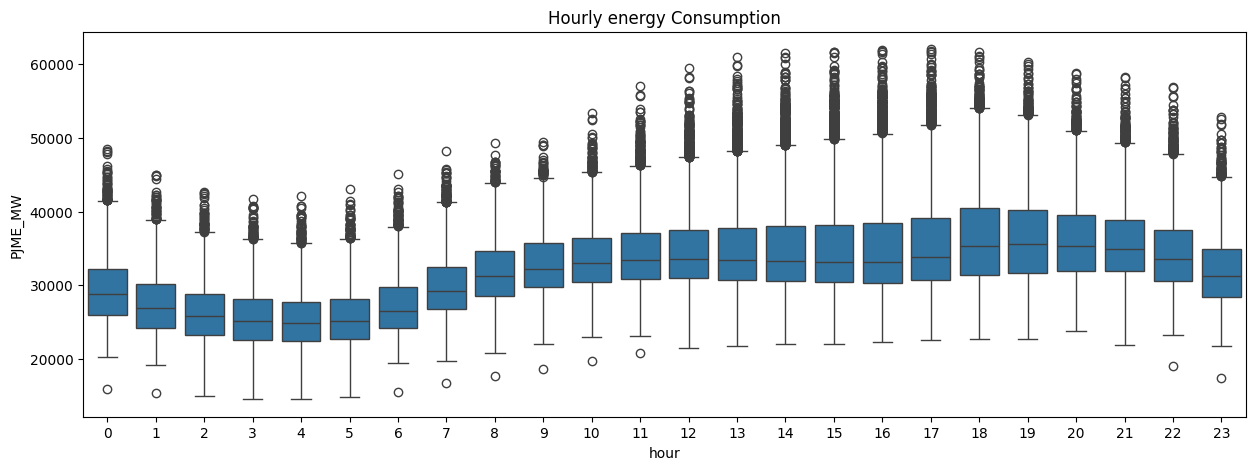

In [15]:
#Hourly energy consumption
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.hour, y=df.PJME_MW)
ax.set_title('Hourly energy Consumption')
plt.show()

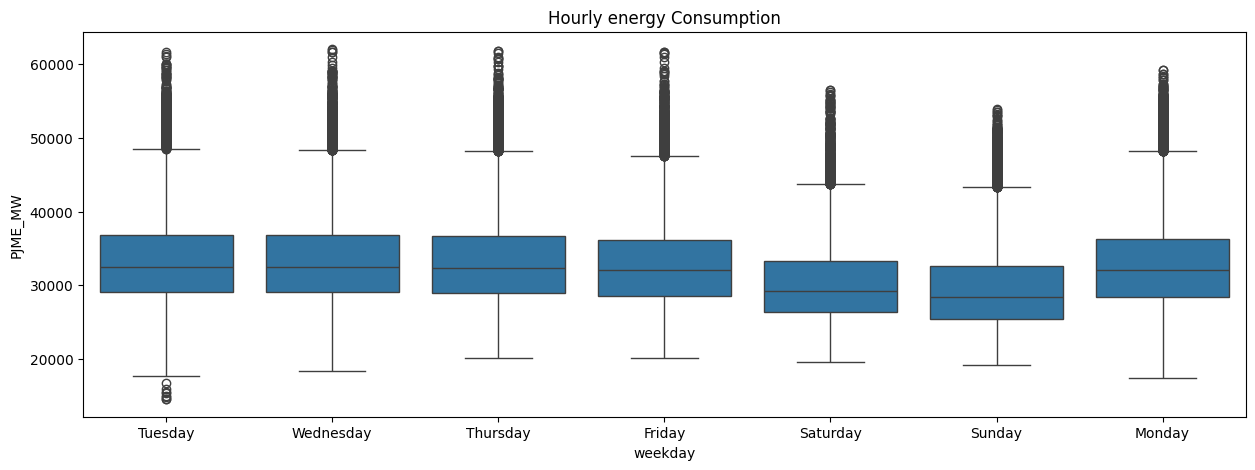

In [16]:
#Weekday energy consumption
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.weekday, y=df.PJME_MW)
ax.set_title('Hourly energy Consumption')
plt.show()

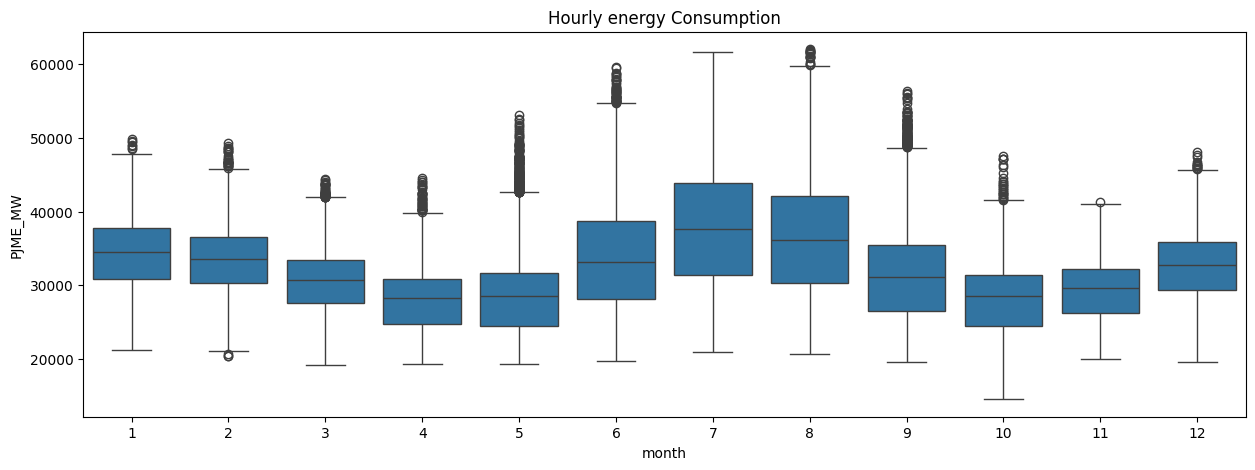

In [17]:
#Monthly energy consumption
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=df.month, y=df.PJME_MW)
ax.set_title('Hourly energy Consumption')
plt.show()

WEEKDAY AND HOUR ENERGY CONSUMPTIO

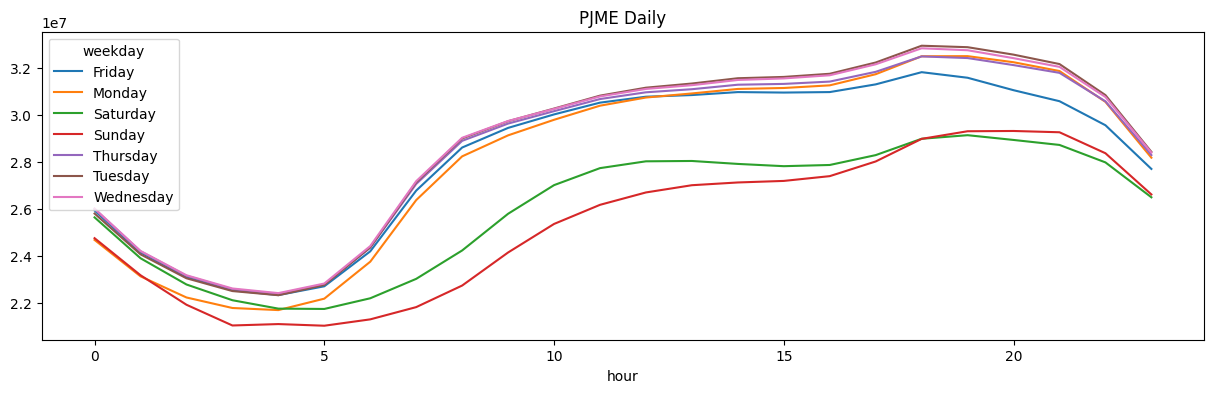

In [18]:
df2 = df.pivot_table(index = df['hour'], columns='weekday', values = 'PJME_MW', aggfunc='sum')
df2.head()
df2.plot(figsize=(15,4), title = 'PJME Daily')
plt.show()

ETS DECOMPOSITION

PJME_MW
Datetime                    
2014-01-12 00:00:00  27017.0
2014-01-12 01:00:00  25494.0
2014-01-12 02:00:00  24590.0
2014-01-12 03:00:00  24129.0
2014-01-12 04:00:00  24095.0

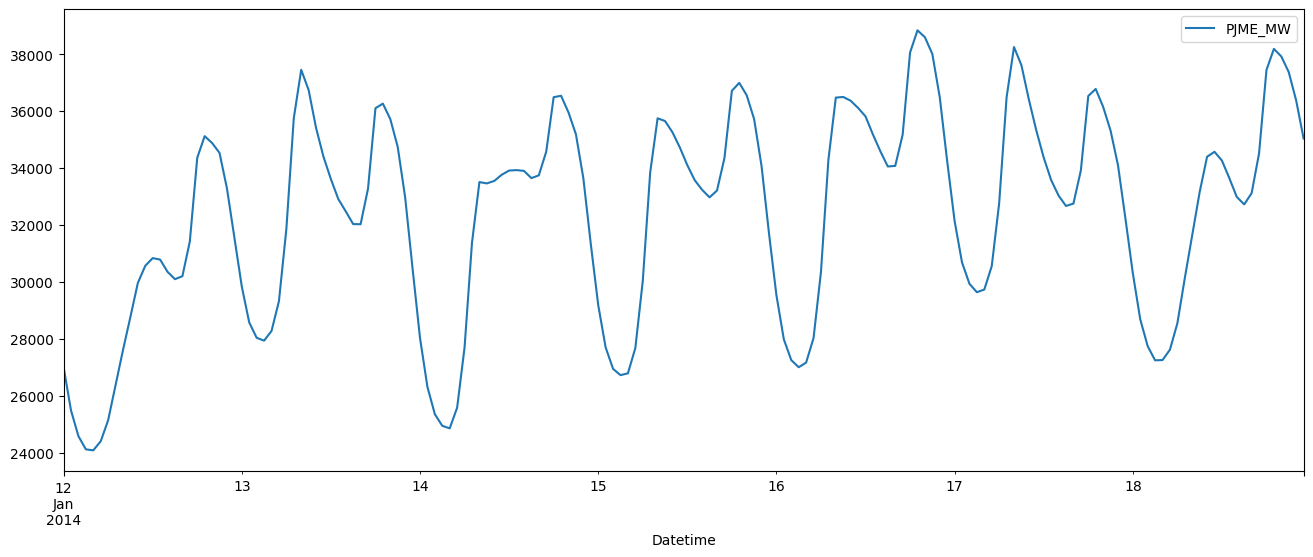

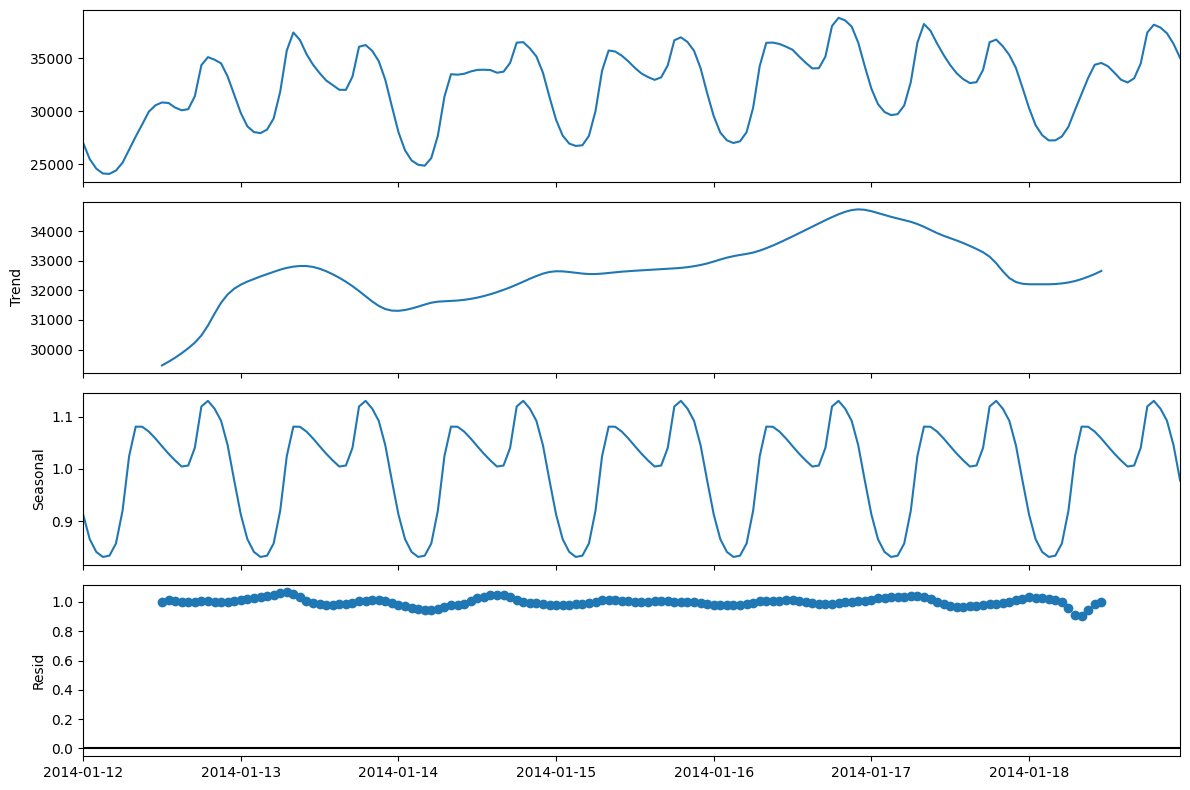

In [19]:
# DAILY SEASONALITY WITHIN WEEK 
from statsmodels.tsa.seasonal import seasonal_decompose
tr_sub = tr_df.loc[tr_df.index >'01-01-2014']
tr_sub = tr_df.loc[(tr_df.index >= '2014-01-12') & (tr_df.index < '2014-01-19')]
display(tr_sub.head())
tr_sub=tr_sub.sort_index()
tr_sub.plot()
result = seasonal_decompose(tr_sub, period= 24, model ='mul')
from pylab import rcParams
rcParams ['figure.figsize'] = 12,8
fig = result.plot()

PJME_MW
Datetime                    
2014-01-01 00:00:00  32595.0
2014-01-01 01:00:00  31440.0
2014-01-01 02:00:00  30626.0
2014-01-01 03:00:00  29949.0
2014-01-01 04:00:00  29716.0

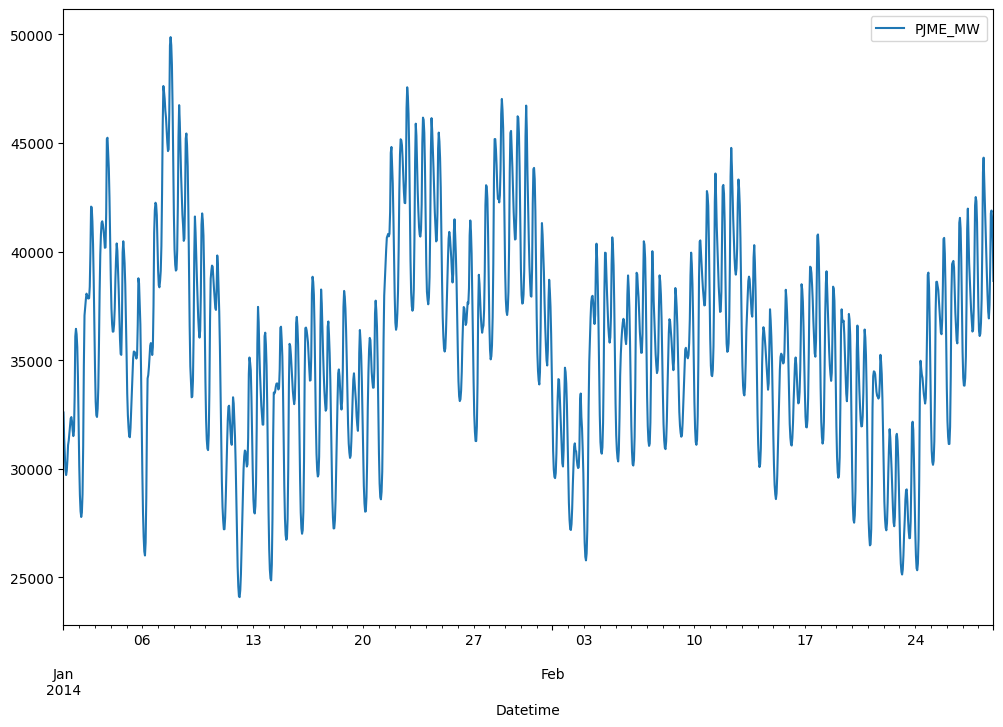

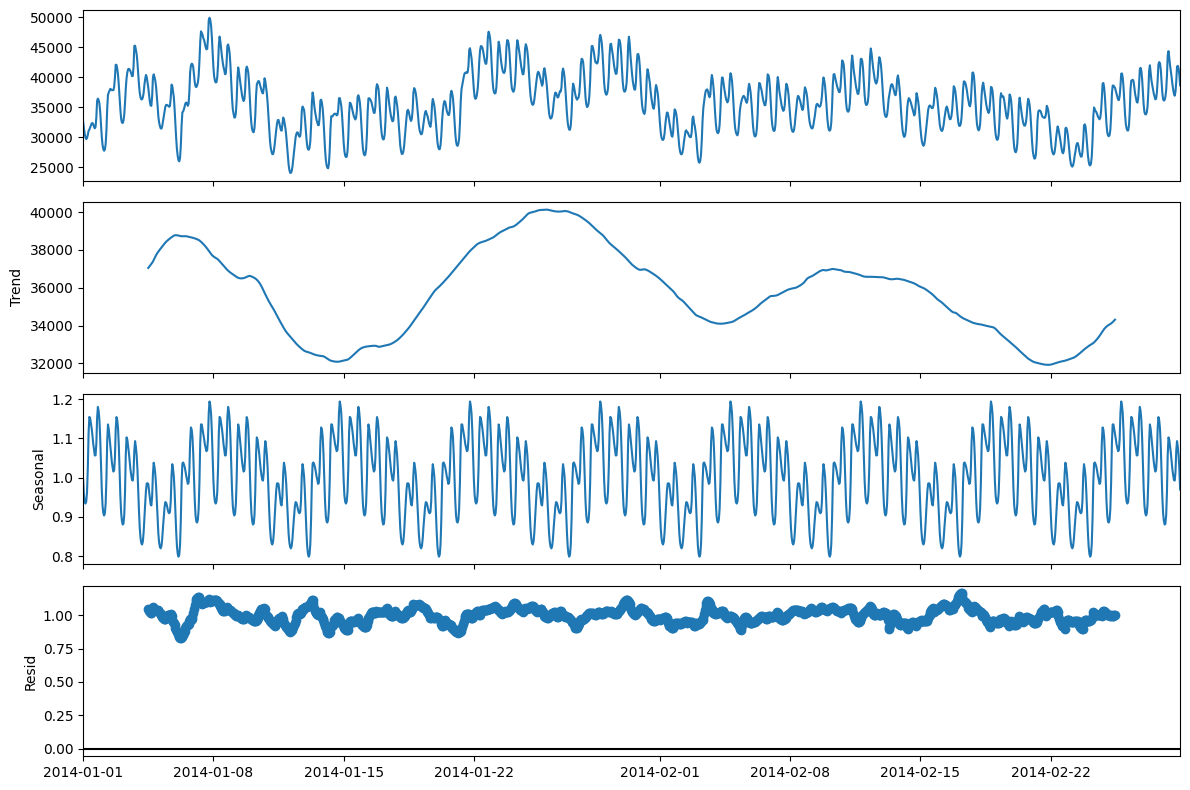

In [20]:
# WEEK SEASONALITY WITHIN WONTH
from statsmodels.tsa.seasonal import seasonal_decompose
tr_sub = tr_df.loc[tr_df.index >'01-01-2014']
tr_sub = tr_df.loc[(tr_df.index >= '2014-01-01') & (tr_df.index < '2014-03-01')]
display(tr_sub.head())
tr_sub=tr_sub.sort_index()
tr_sub.plot()
result = seasonal_decompose(tr_sub, period= 24*7, model ='mul')
from pylab import rcParams
rcParams ['figure.figsize'] = 12,8
fig = result.plot()

PJME_MW
Datetime                    
2011-01-01 00:00:00  29871.0
2011-01-01 01:00:00  28638.0
2011-01-01 02:00:00  27630.0
2011-01-01 03:00:00  26838.0
2011-01-01 04:00:00  26443.0

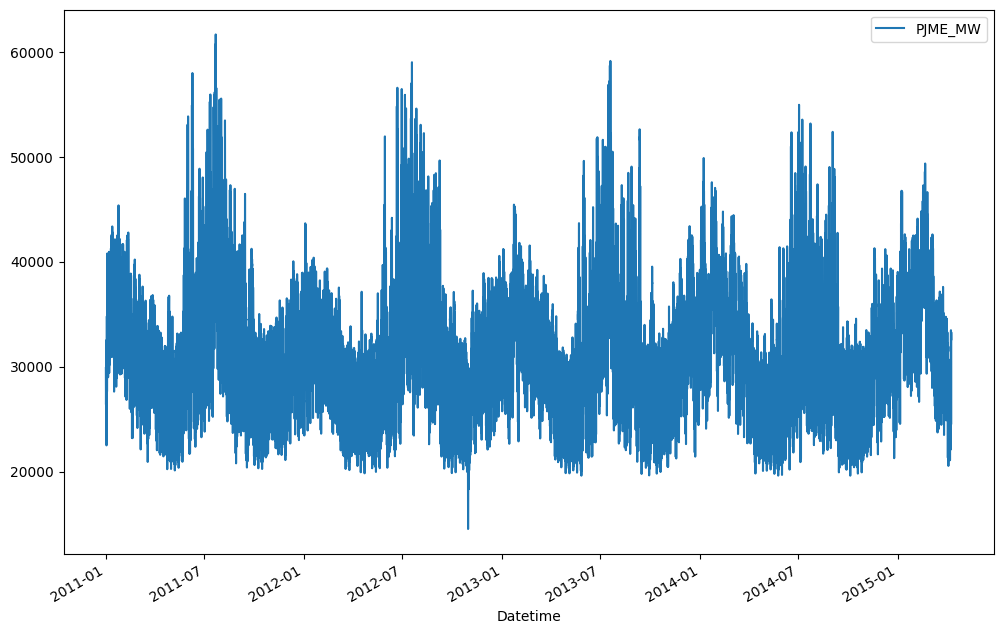

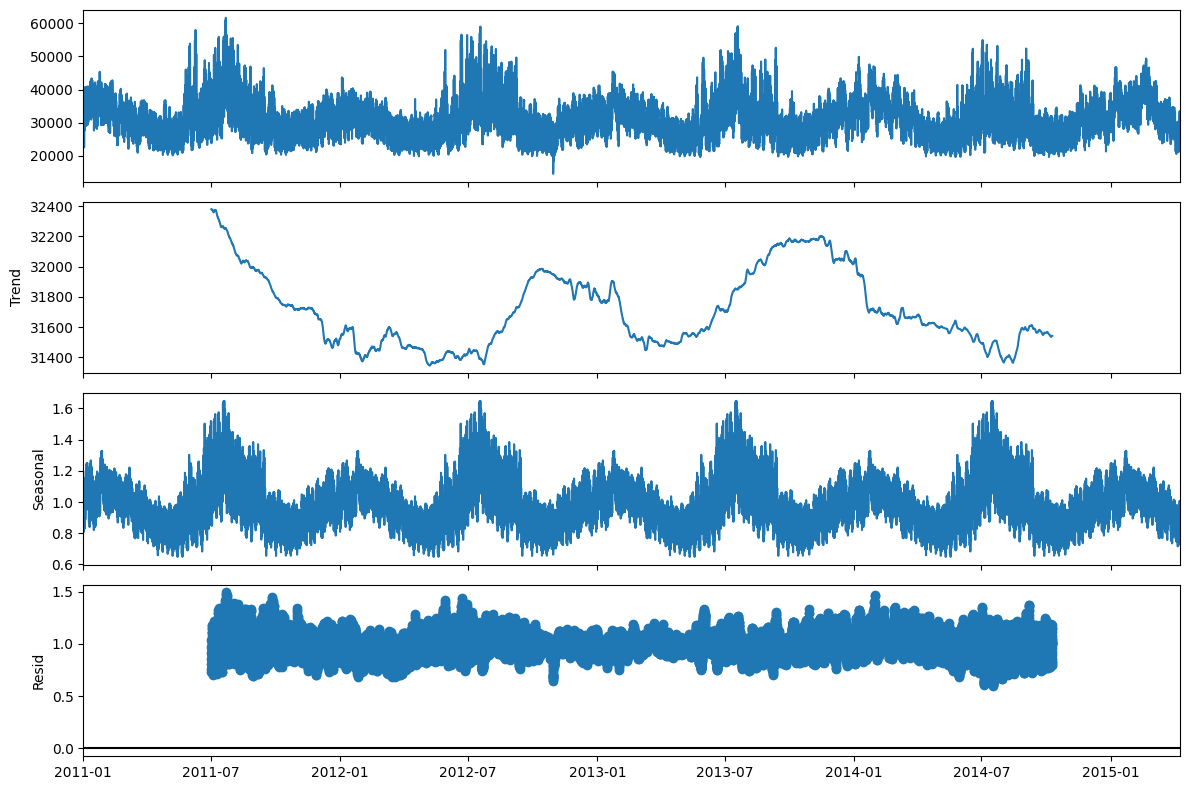

In [21]:
# MONTH SEASONALITY WITHIN YEAR
from statsmodels.tsa.seasonal import seasonal_decompose
tr_sub = tr_df.loc[tr_df.index >'01-01-2014']
tr_sub = tr_df.loc[(tr_df.index >= '2011-01-01') & (tr_df.index < '2017-02-01')]
display(tr_sub.head())
tr_sub=tr_sub.sort_index()
tr_sub.plot()
result = seasonal_decompose(tr_sub, period= 24*7*52, model ='mul')
from pylab import rcParams
rcParams ['figure.figsize'] = 12,8
fig = result.plot()

RESAMPLED VIEW DATA AT AGGREGATE LEVEL

Datetime
2002-01-01    31080.739130
2002-01-02    34261.541667
2002-01-03    34511.875000
2002-01-04    33715.458333
2002-01-05    30405.125000
Freq: D, Name: PJME_MW, dtype: float64

<Axes: xlabel='Datetime'>

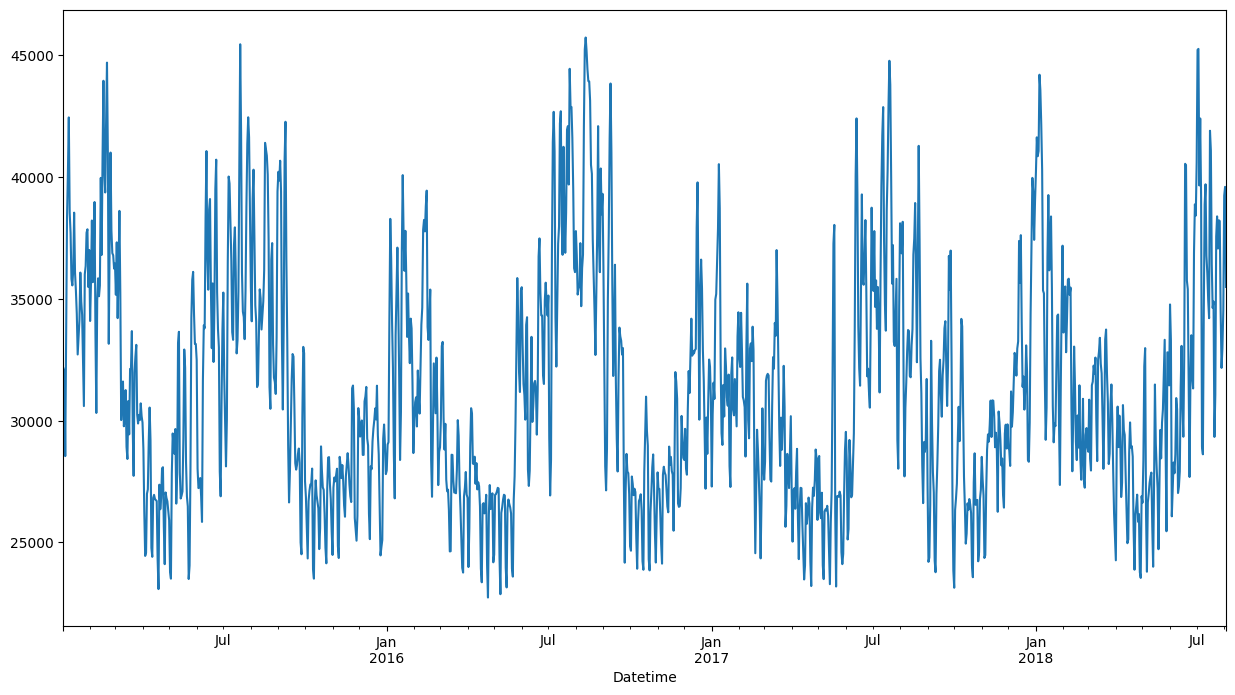

In [22]:
#DAILY WEEKLY 
daily_df = df['PJME_MW'].resample('1D').mean()
display(daily_df.head())
rcParams['figure.figsize']= 15,8
daily_df.loc[daily_df.index >'2015'].plot()

Datetime
2002-01-01    32527.491018
2002-01-08    31240.119048
2002-01-15    31571.732143
2002-01-22    29720.517857
2002-01-29    29635.892857
Freq: 7D, Name: PJME_MW, dtype: float64

<Axes: xlabel='Datetime'>

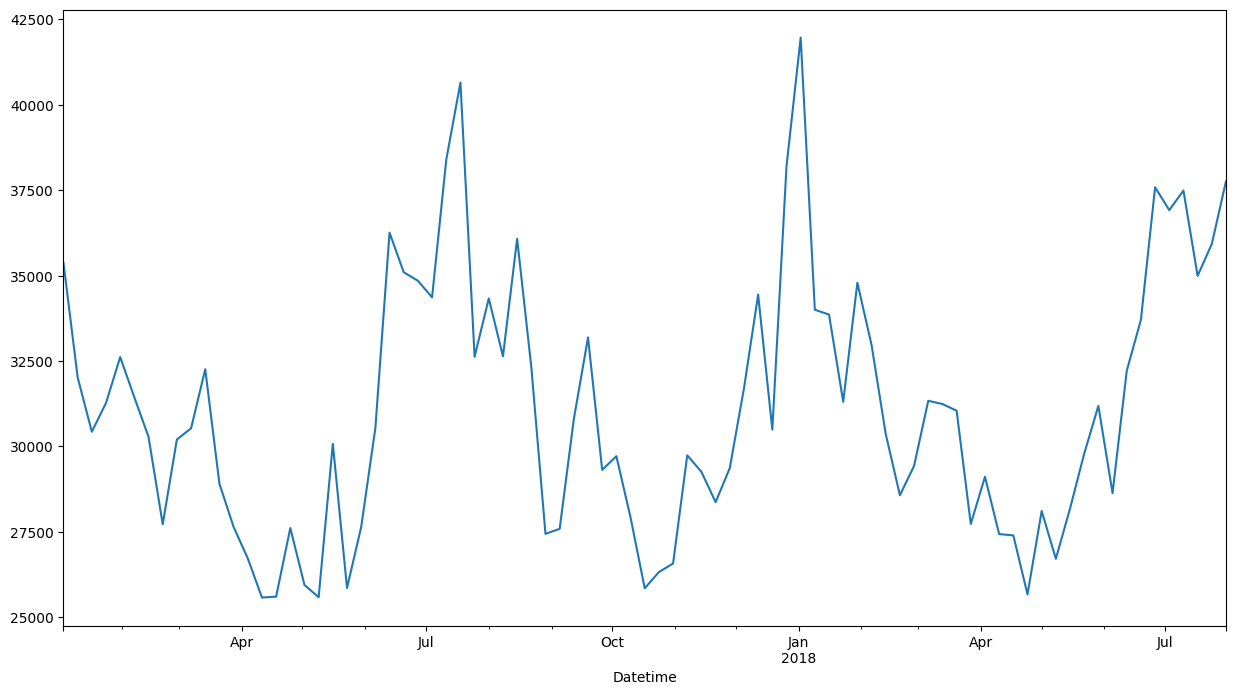

In [23]:
#WEEKLY
daily_df = df['PJME_MW'].resample('7D').mean()
display(daily_df.head())
rcParams['figure.figsize']= 15,8
daily_df.loc[daily_df.index >'2017'].plot()

/tmp/ipykernel_25276/3541691084.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  daily_df = df['PJME_MW'].resample('1M').mean()


Datetime
2002-01-31    31075.399731
2002-02-28    30239.166667
2002-03-31    28875.256720
2002-04-30    28534.731572
2002-05-31    28073.653226
Freq: ME, Name: PJME_MW, dtype: float64

<Axes: xlabel='Datetime'>

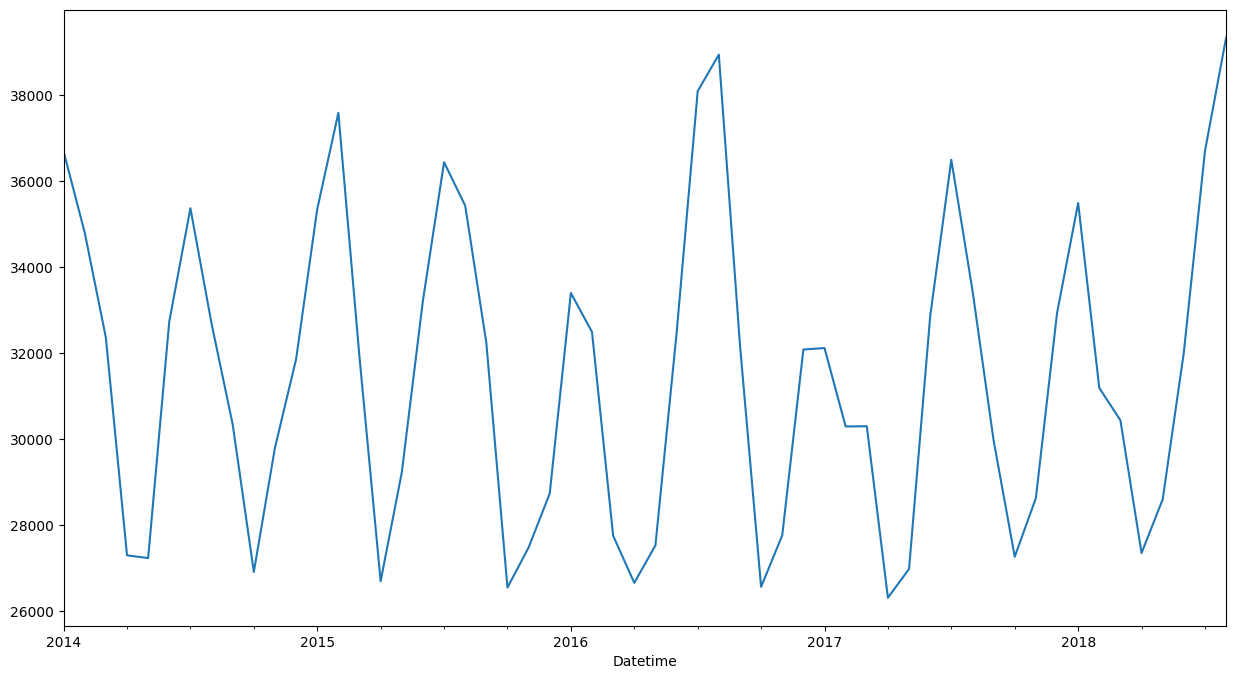

In [24]:
#MONTHLY
daily_df = df['PJME_MW'].resample('1M').mean()
display(daily_df.head())
rcParams['figure.figsize']= 15,8
daily_df.loc[daily_df.index >'2014'].plot()

In [25]:
#EVALUATION MATRICS
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

def validate_1(test_df, pred_df, var):
    pred_res = pred_df(var)
    test = test_df[var]
    mse = mean_squared_error(pred_res, test)
    rmse   = mean_squared_error(pred_res, test, squared = False)
    mae = mean_absolute_error(pred_res, test)
    mape = mean_absolute_percentage_error(pred_res, test)
    print("mse={:.3f}, rmse={:.3f}, mae={:.3f}, mape={:.3f}.". format(mse,rmse,mae,mape))
    return mse,rmse,mae,mape

# to make sure the index is datetime variable
def plot_and_validate_1(train_df, test_df,pred_df,var):
    rcParams['figure.figsize'] = 15,6
    train_df[var].plot(label= 'Train', legend = True, linewidth =2)
    test_df[var].plot(label= 'Test', legend = True, linewidth =2)
    pred_df[var].plot(label= 'Pred', legend = True, linewidth =2)
    validate(test_df,pred_df,var)

def sample_func(a,f):
    return 1/len(a) * np.sum(2*np.abs(f-a) / (np.abs(a) + np.abs(f)))

def validate(test_df, pred_df, te_var,pred_var):
    merged = test_df.merge(pred_df,left_index = True, right_index = True)
    pred_res = merged[te_var]
    test = merged[pred_var]
    mse = mean_squared_error(pred_res, test)
    rmse = mean_squared_error(pred_res, test, squared = False)
    mae = mean_absolute_error(pred_res, test)
    mape = mean_absolute_percentage_error(pred_res, test)
    smape = sample_func(test, pred_res)
    print("mse={:.3f}, rmse={:.3f}, mae={:.3f}, mape={:.3f}, smape ={:.3f}".format(mse,rmse,mae,mape, smape))
    return mse,rmse,mae,mape

def plot_and_validate(train_df, test_df,pred_df,te_var,pred_var):
    rcParams['figure.figsize'] = 15,6
    train_df[te_var].plot(label= 'Train', legend = True, linewidth =2)
    merged = test_df.merge(pred_df, left_index = True, right_index = True)
    merged[te_var].plot(label= 'Test', legend = True, linewidth =2)
    merged[te_var].plot(label= 'Pred', legend = True, linewidth =2)
    validate(test_df,pred_df,te_var, pred_var)

PHROPHET MODEL

/home/veinmahzy/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


ds        y
datetimeIndex                                   
2002-01-01 01:00:00 2002-01-01 01:00:00  30393.0
2002-01-01 02:00:00 2002-01-01 02:00:00  29265.0
2002-01-01 03:00:00 2002-01-01 03:00:00  28357.0
2002-01-01 04:00:00 2002-01-01 04:00:00  27899.0
2002-01-01 05:00:00 2002-01-01 05:00:00  28057.0

12:45:30 - cmdstanpy - INFO - Chain [1] start processing
12:46:02 - cmdstanpy - INFO - Chain [1] done processing


ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2015-04-09 15:00:00  31975.680830  27943.794371  37079.720644  31975.680830   
1 2015-04-09 16:00:00  31975.688973  28283.879640  37060.215808  31975.688973   
2 2015-04-09 17:00:00  31975.697115  28139.471381  37473.022050  31975.697115   
3 2015-04-09 18:00:00  31975.705257  28845.760539  38003.781346  31975.705257   
4 2015-04-09 19:00:00  31975.713400  29441.657574  38241.252047  31975.713400   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  31975.680830      520.033550            520.033550            520.033550   
1  31975.688973      640.854246            640.854246            640.854246   
2  31975.697115      926.580486            926.580486            926.580486   
3  31975.705257     1406.560821           1406.560821           1406.560821   
4  31975.713400     1864.330812           1864.330812           1864.330812   

         daily  ...       weekly  weekly_lower  weekly_upper       yearly  \
0  2984.444953  ...  1095.284381   1095.284381   1095.284381 -3559.695784   
1  3121.588424  ...  1082.420353   1082.420353   1082.420353 -3563.154531   
2  3423.316433  ...  1069.882063   1069.882063   1069.882063 -3566.618010   
3  3919.007866  ...  1057.639124   1057.639124   1057.639124 -3570.086169   
4  4392.260640  ...  1045.629129   1045.629129   1045.629129 -3573.558957   

   yearly_lower  yearly_upper  multiplicative_terms  \
0  -3559.695784  -3559.695784                   0.0   
1  -3563.154531  -3563.154531                   0.0   
2  -3566.618010  -3566.618010                   0.0   
3  -3570.086169  -3570.086169                   0.0   
4  -3573.558957  -3573.558957                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                         0.0                         0.0  32495.714381  
1                         0.0                         0.0  32616.543219  
2                         0.0                         0.0  32902.277601  
3                         0.0                         0.0  33382.266079  
4                         0.0                         0.0  33840.044212  

[5 rows x 22 columns]

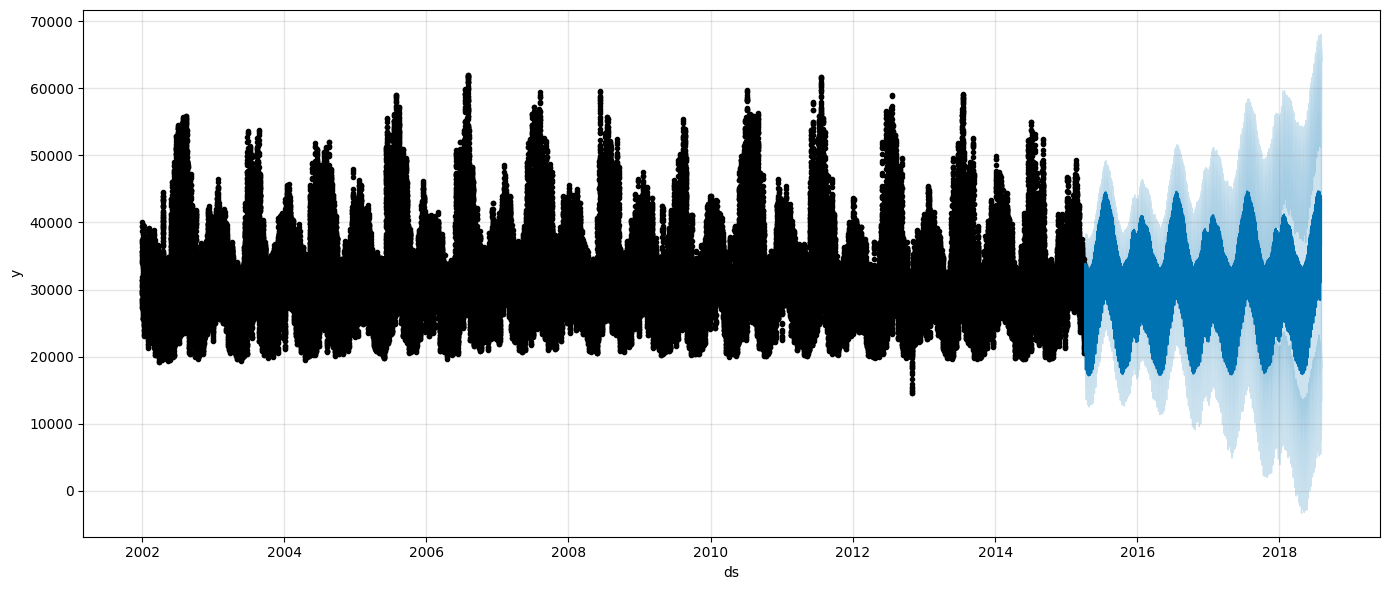

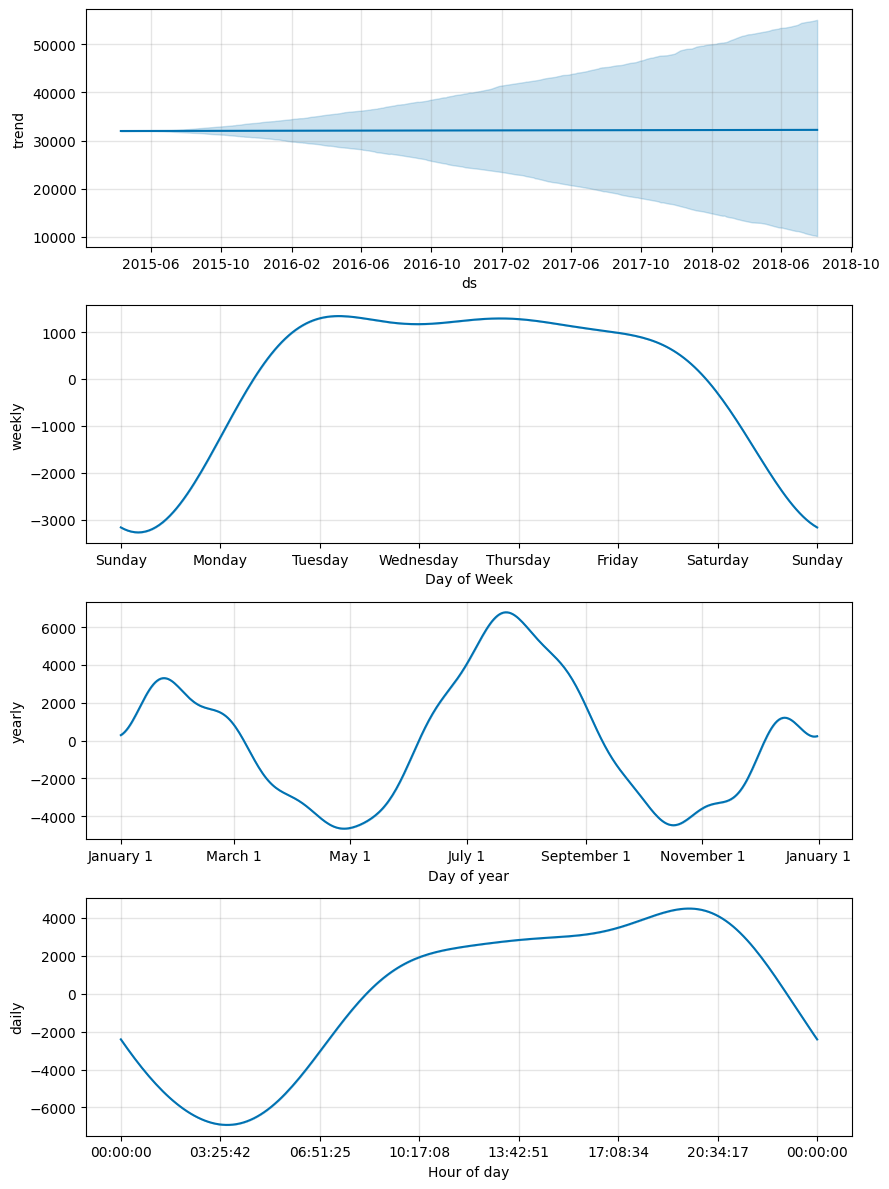

In [26]:
from prophet import Prophet
tr_df,te_df, df = get_train_test_generic(for_prophet=True, freq=None)
display(tr_df.head())
m = Prophet(daily_seasonality = True, weekly_seasonality = True, yearly_seasonality= True)
m.fit(tr_df)
future = m.make_future_dataframe(periods= len(te_df),freq = 'h', include_history = False)
forecast = m.predict(future)
fig = m.plot(forecast, figsize = (14,6))
display(forecast.head())
m.plot_components(forecast);


/home/veinmahzy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mse=17244508.861, rmse=4152.651, mae=3319.013, mape=0.107, smape =0.104


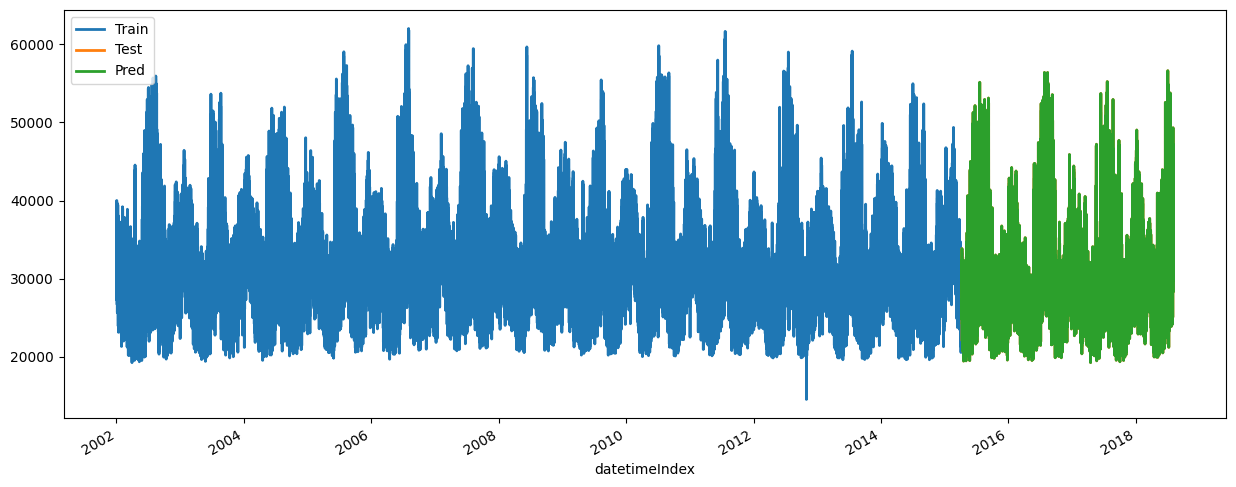

In [27]:
forecast.index = forecast.ds
plot_and_validate(tr_df, te_df, forecast, 'y', 'yhat')

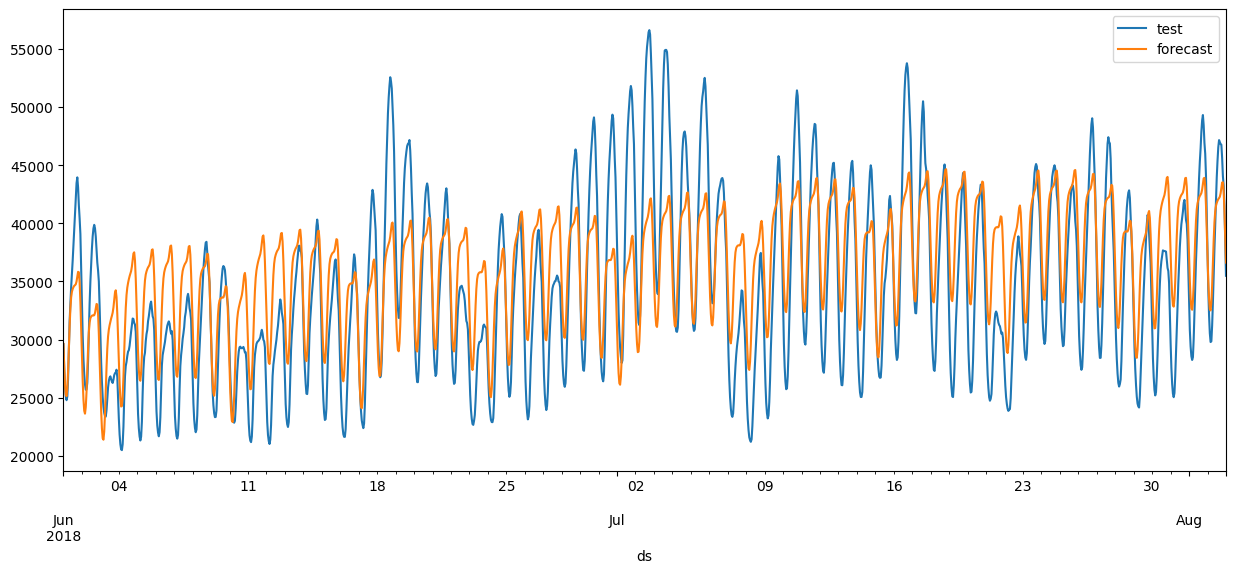

In [28]:
te_df.loc['2018-06-01':]['y'].plot(legend=True, label = 'test')
forecast.loc['2018-06-01':]['yhat'].plot(legend= True, label = 'forecast')
plt.show()

ds         y
datetimeIndex                     
2002-01-01    2002-01-01  714857.0
2002-01-02    2002-01-02  822277.0
2002-01-03    2002-01-03  828285.0
2002-01-04    2002-01-04  809171.0
2002-01-05    2002-01-05  729723.0

12:46:08 - cmdstanpy - INFO - Chain [1] start processing
12:46:09 - cmdstanpy - INFO - Chain [1] done processing


ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2015-04-10  748029.094783  610058.511395  786987.595763  748029.094783   
1 2015-04-11  748037.904658  551780.451824  719958.140171  748037.904658   
2 2015-04-12  748046.714532  526896.589148  691591.668865  748046.714532   
3 2015-04-13  748055.524406  607485.890511  770397.100544  748055.524406   
4 2015-04-14  748064.334280  616417.235010  785351.565415  748064.334280   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  748029.094783   -54291.743673         -54291.743673         -54291.743673   
1  748037.904658  -118413.220948        -118413.220948        -118413.220948   
2  748046.714532  -140340.959274        -140340.959274        -140340.959274   
3  748055.524406   -60689.970951         -60689.970951         -60689.970951   
4  748064.334280   -48112.729393         -48112.729393         -48112.729393   

         daily  ...        weekly  weekly_lower  weekly_upper        yearly  \
0  20288.95871  ...  14784.381362  14784.381362  14784.381362 -89365.083745   
1  20288.95871  ... -47334.981170 -47334.981170 -47334.981170 -91367.198489   
2  20288.95871  ... -67230.134906 -67230.134906 -67230.134906 -93399.783078   
3  20288.95871  ...  14461.277548  14461.277548  14461.277548 -95440.207209   
4  20288.95871  ...  29062.726400  29062.726400  29062.726400 -97464.414503   

   yearly_lower  yearly_upper  multiplicative_terms  \
0 -89365.083745 -89365.083745                   0.0   
1 -91367.198489 -91367.198489                   0.0   
2 -93399.783078 -93399.783078                   0.0   
3 -95440.207209 -95440.207209                   0.0   
4 -97464.414503 -97464.414503                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0  693737.351111  
1                         0.0                         0.0  629624.683709  
2                         0.0                         0.0  607705.755258  
3                         0.0                         0.0  687365.553455  
4                         0.0                         0.0  699951.604887  

[5 rows x 22 columns]

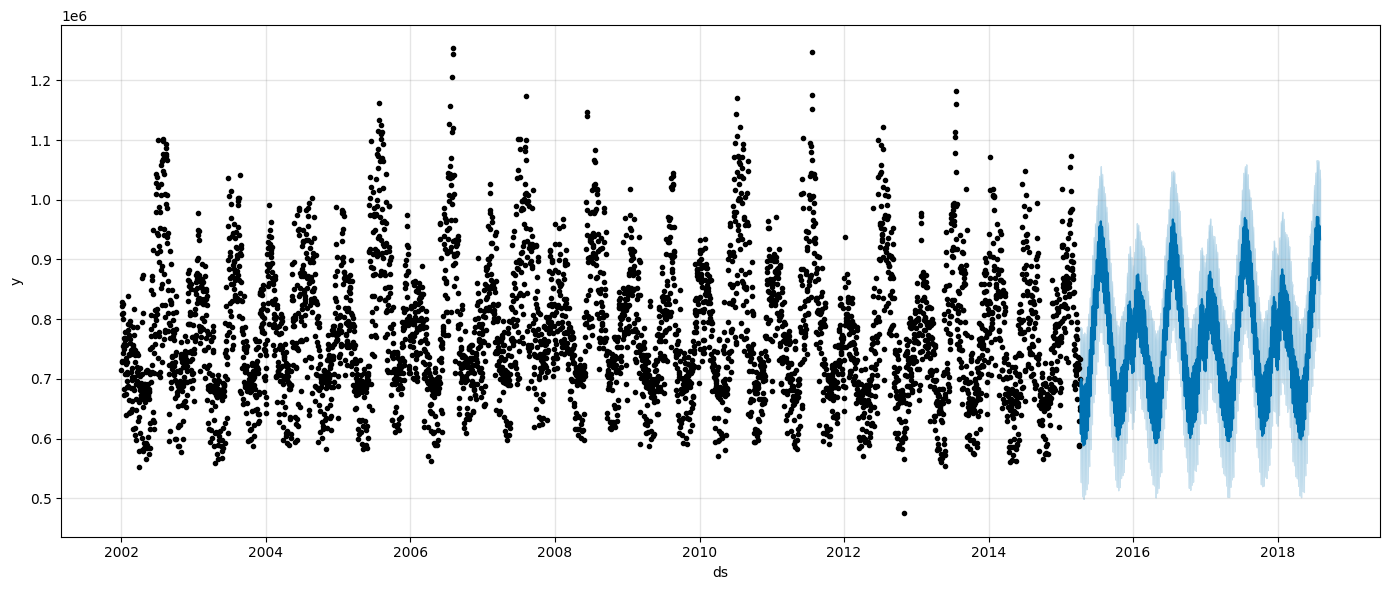

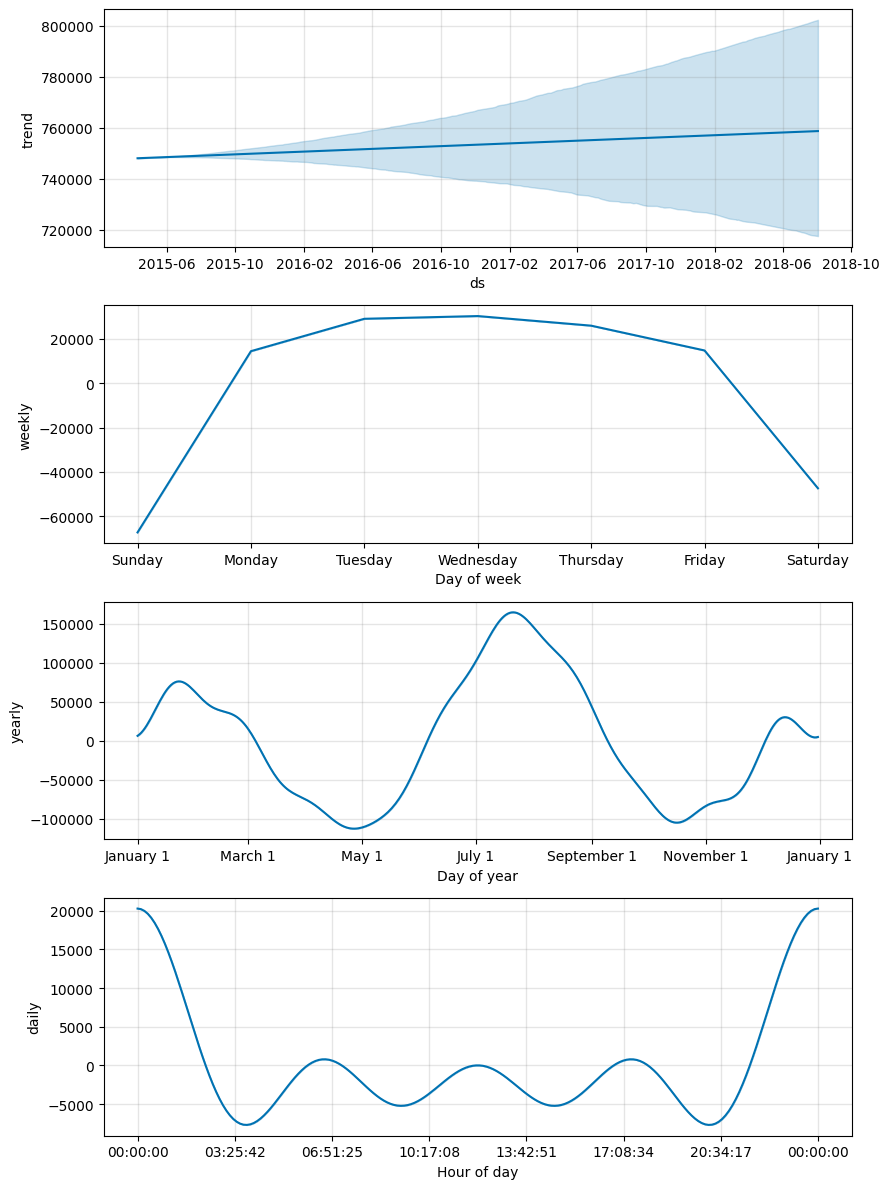

In [29]:
# day level forecast
from prophet import Prophet
tr_df,te_df, df = get_train_test_generic(for_prophet=True, freq='1D')
display(tr_df.head())
m = Prophet(daily_seasonality = True, weekly_seasonality = True, yearly_seasonality= True)
m.fit(tr_df)
future = m.make_future_dataframe(periods= len(te_df),include_history = False)
forecast = m.predict(future)
fig = m.plot(forecast, figsize = (14,6))
display(forecast.head())
m.plot_components(forecast);


mse=7276958440.576, rmse=85305.090, mae=66881.383, mape=0.110, smape =0.088


/home/veinmahzy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


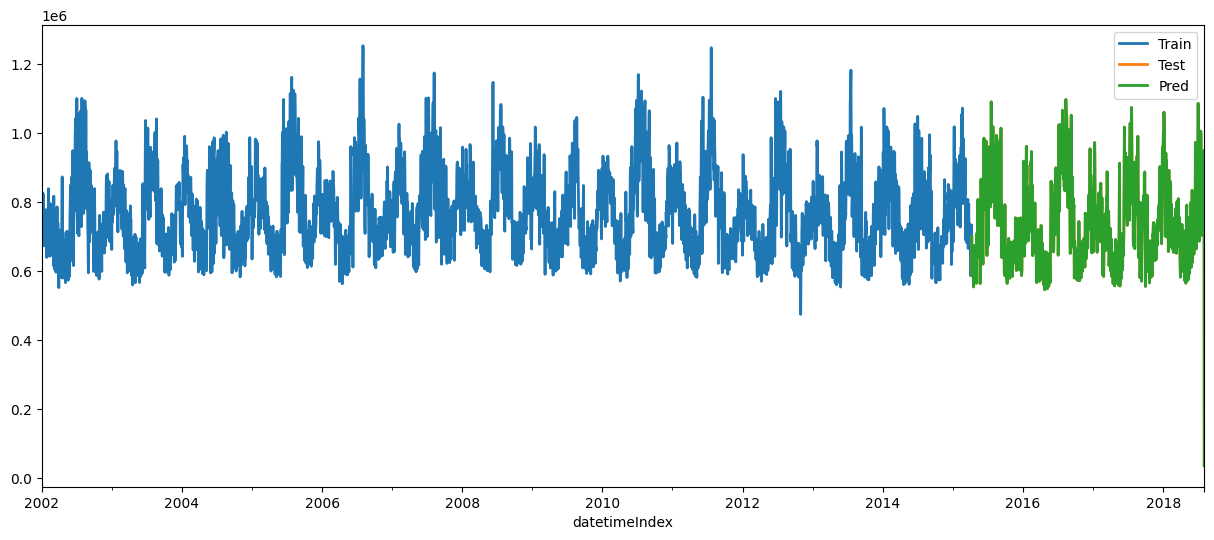

In [30]:
forecast.index = forecast.ds
plot_and_validate(tr_df, te_df, forecast, 'y', 'yhat')

9.1 ADDING CUSTOM SEASONALITY

12:46:16 - cmdstanpy - INFO - Chain [1] start processing
12:47:41 - cmdstanpy - INFO - Chain [1] done processing
/home/veinmahzy/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
/home/veinmahzy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mse=17517703.199, rmse=4185.416, mae=3332.809, mape=0.108, smape =0.105


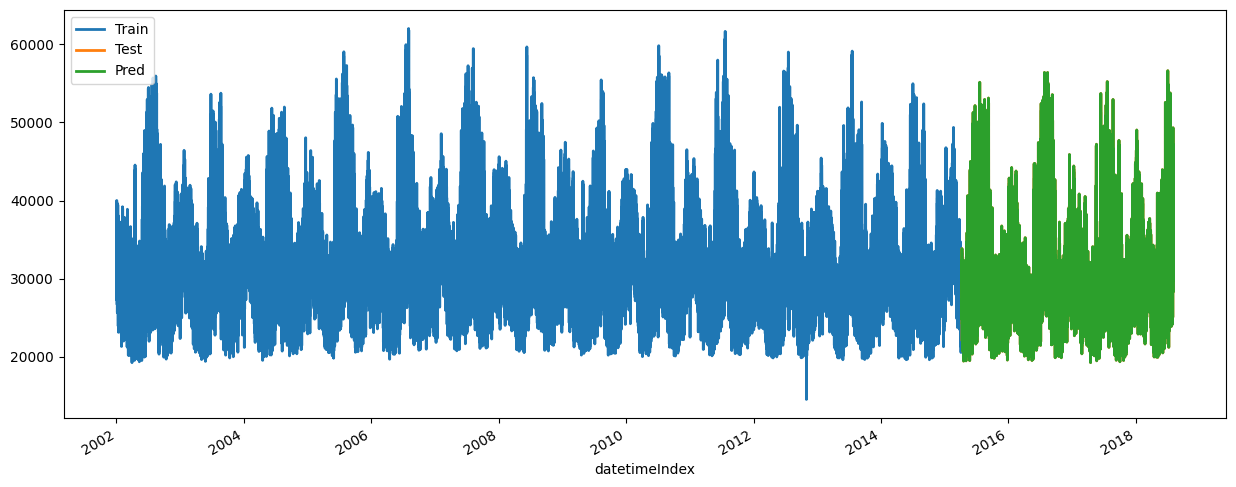

In [31]:
from prophet import Prophet
tr_df, te_df, df= get_train_test_generic(for_prophet=True, freq= None)
m= Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='quarterly', period=121,fourier_order=5)
m.fit(tr_df)
future = m.make_future_dataframe(periods=len(te_df), freq='H',include_history=False)
forecast = m.predict(future)
forecast.index = forecast.ds
plot_and_validate(tr_df, te_df, forecast, 'y', 'yhat')

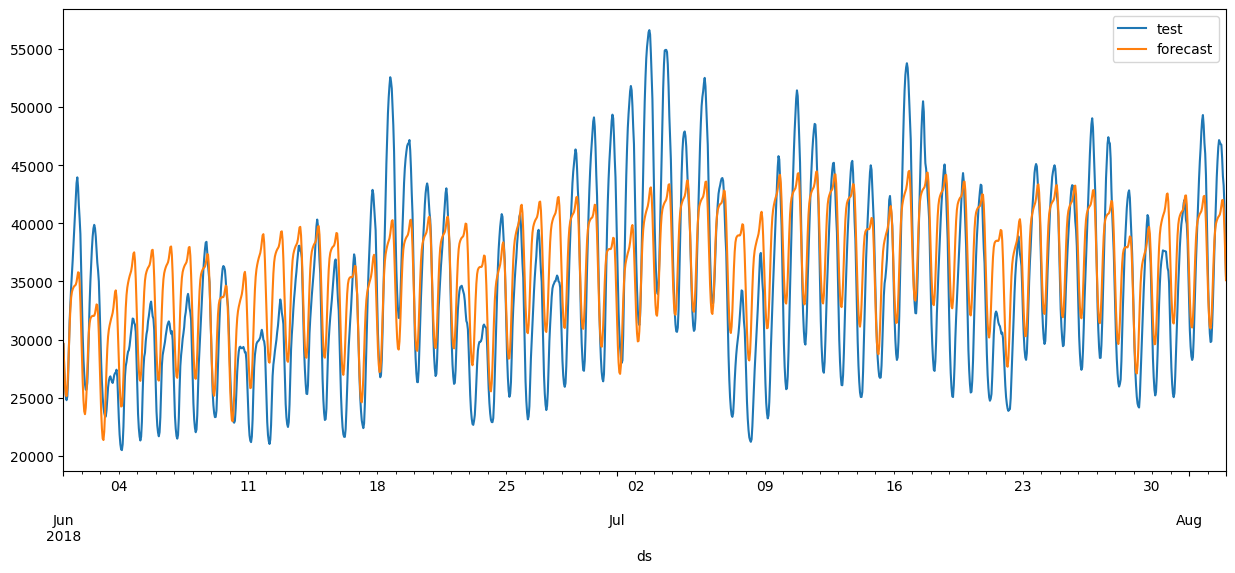

In [32]:
te_df.loc['2018-06-01':]['y'].plot(legend=True, label = 'test')
forecast.loc['2018-06-01':]['yhat'].plot(legend= True, label ='forecast')
plt.show()

FEATURE ENGINEERING FOR PROPHET
1. ADD SEASONALITY
2. ADD COUNTRY HOLIDAYS
3. DISPLAY TREND CHANGEPOINTS
4. SETTING CAPS TO PREDICTION
5. ADDING REGRESSOR 
6. SEACRH OPTIMUM PARAMETER USING GRID SEARCH
7. PERFOM CROSS VALIDATION

In [33]:
def is_high_peak_month(ds):
    date = pd.to_datetime(ds)
    return (date.month in[6,7,8])

def is_mid_peak_month(ds):
    date = pd.to_datetime(ds)
    return (date.month in[1,2,3,9,12])

def is_low_peak_month(ds):
    date = pd.to_datetime(ds)
    return (date.month in[4,5,10,11])

def is_low_peak_week(ds):
    date = pd.to_datetime(ds)
    day_name = date.day_name()
    return day_name in['Saturday','Sunday']
    
def is_low_peak_hour(ds):
    date = pd.to_datetime(ds)
    return date.hour in [0,1,2,3,4,5,6]

def generate_new_feature(df):
    df['high_peak_month'] = df['ds'].apply(is_high_peak_month)
    df['mid_peak_month'] = df['ds'].apply(is_mid_peak_month)
    df['low_peak_month'] = df['ds'].apply(is_low_peak_month)
    df['low_peak_week'] = df['ds'].apply(is_low_peak_week)
    df['high_peak_wekk'] = -df['ds'].apply(is_low_peak_week)
    df['low_peak_hour'] = df['ds'].apply(is_low_peak_hour)
    df['high_peak_hour'] = -df['ds'].apply(is_low_peak_hour)
    return df

In [34]:
tr_df, te_df, df = get_train_test_generic(for_prophet= True,freq= None)
tr_df = generate_new_feature(tr_df)
te_df = generate_new_feature(te_df)
df = generate_new_feature(df)

12:47:57 - cmdstanpy - INFO - Chain [1] start processing
12:49:15 - cmdstanpy - INFO - Chain [1] done processing
/home/veinmahzy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mse=17265469.317, rmse=4155.174, mae=3316.534, mape=0.107, smape =0.104


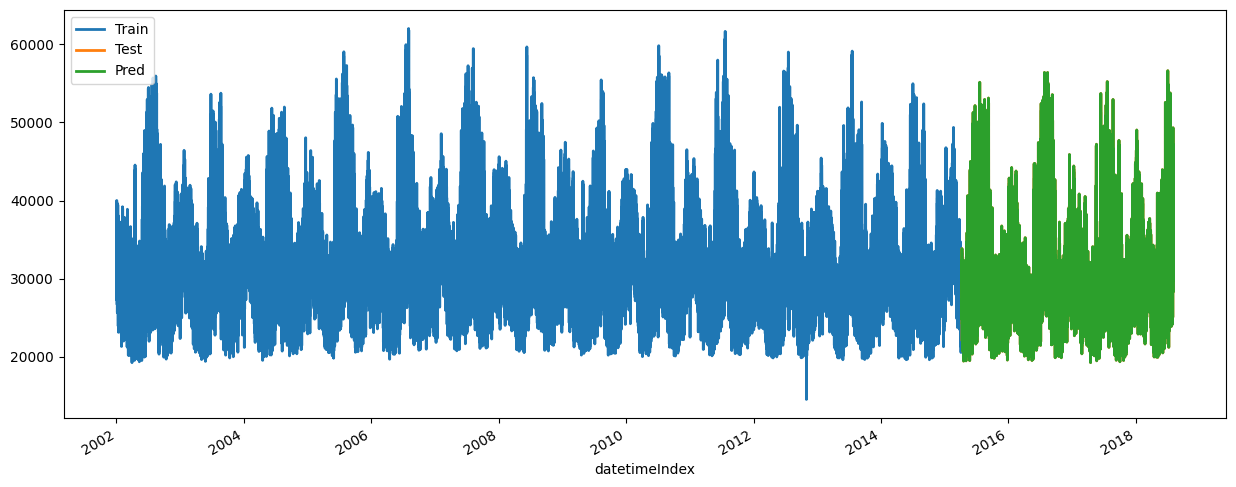

In [35]:
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m.add_seasonality(name = 'high_peak_month',period=30.5, fourier_order=5,condition_name= 'high_peak_month')
m.add_seasonality(name = 'mid_peak_month',period= 30.5, fourier_order=5, condition_name='mid_peak_month')
m.add_seasonality(name = 'low_peak_month', period = 30.5 , fourier_order=5, condition_name='low_peak_month')

m.add_country_holidays(country_name='US')
m.fit(tr_df)
future = m.make_future_dataframe(periods=len(te_df),freq='h', include_history=False)
future = generate_new_feature(future)
forecast = m.predict(future)
forecast.index = forecast.ds
plot_and_validate(tr_df, te_df, forecast, 'y', 'yhat')

TREND CHANGE POINT

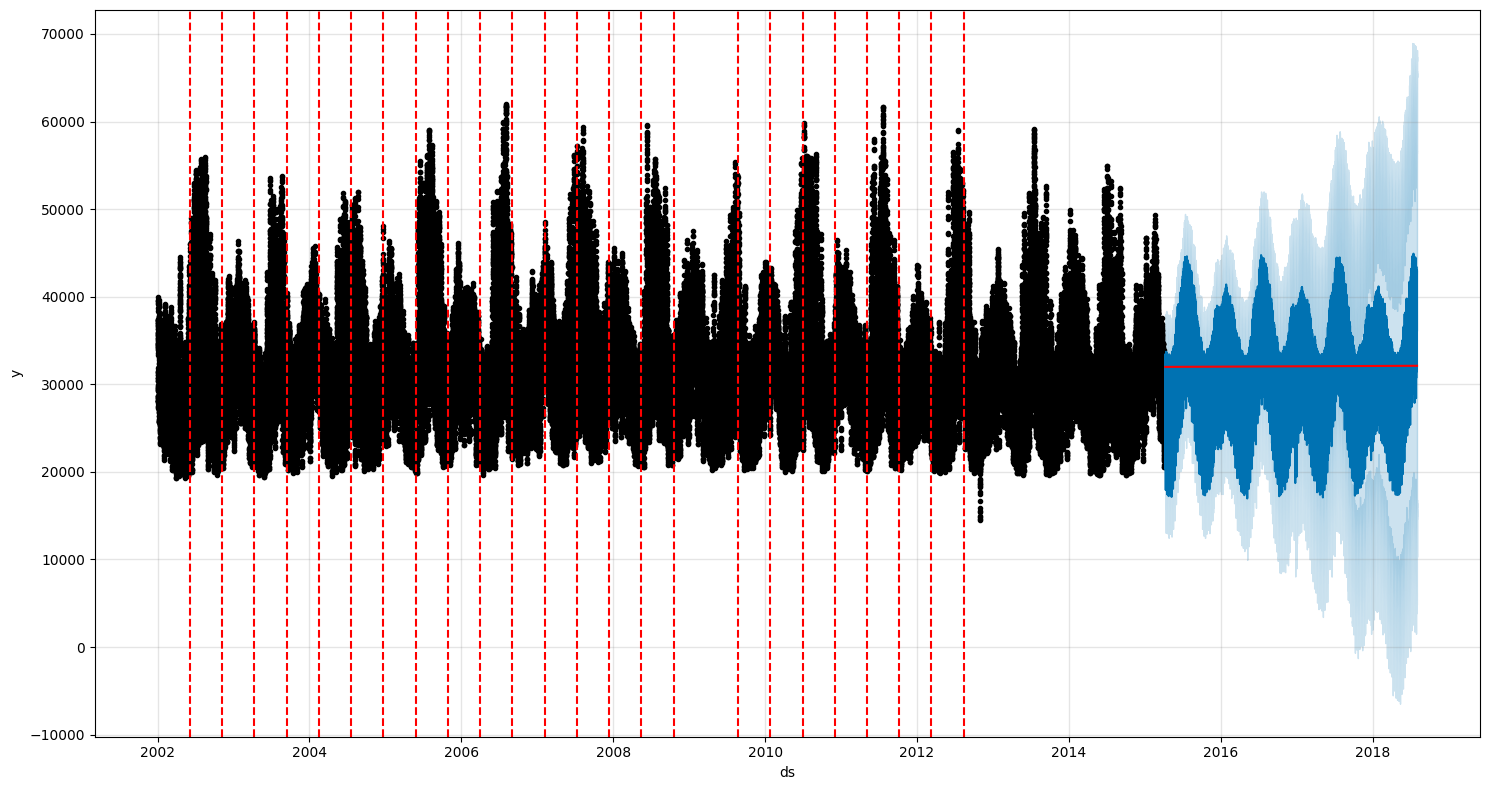

In [36]:
from prophet.plot import plot_yearly, add_changepoints_to_plot
fig= m.plot(forecast, figsize=(15,8))
a = add_changepoints_to_plot(fig.gca(), m, forecast)

change point by default is 25 and by default changepoint_range is 0.8 (use 80% of the data)

ADD REGRESSOR

In [37]:
def is_high_peak_month(ds):
    date = pd.to_datetime(ds)
    return int((date.month in [6,7,8]))

def is_mid_peak_mont(ds):
    date = pd.to_datetime(ds)
    return  int ((date.month in[1,2,3,9,12]))

def is_low_peak_week(ds):
    date = pd.to_datetime(ds)
    day_name = date.day_name()
    return int(day_name in['Saturday', 'Sunday'])

def is_low_peak_hour(ds):
    date=pd.to_datetime(ds)
    return int(date.hour in [0,1,2,3,4,5,6])


def generate_regressor_feature(df):
    df['high_peak_month'] = df['ds'].apply(is_high_peak_month)
    df['mid_peak_month'] = df['ds'].apply(is_mid_peak_month)
    df['low_peak_month'] = df['ds'].apply(is_low_peak_month)
    df['low_peak_week'] = df['ds'].apply(is_low_peak_week)
    df['low_peak_hour'] = df['ds'].apply(is_low_peak_hour)
    return df

In [38]:
tr_df, te_df, df = get_train_test_generic(for_prophet=True, freq=None)
tr_df = generate_regressor_feature(tr_df)
te_df = generate_regressor_feature(te_df)
df = generate_regressor_feature(df)
display(df.head())

ds        y  high_peak_month  \
datetimeIndex                                                       
2002-01-01 01:00:00 2002-01-01 01:00:00  30393.0                0   
2002-01-01 02:00:00 2002-01-01 02:00:00  29265.0                0   
2002-01-01 03:00:00 2002-01-01 03:00:00  28357.0                0   
2002-01-01 04:00:00 2002-01-01 04:00:00  27899.0                0   
2002-01-01 05:00:00 2002-01-01 05:00:00  28057.0                0   

                     mid_peak_month  low_peak_month  low_peak_week  \
datetimeIndex                                                        
2002-01-01 01:00:00            True           False              0   
2002-01-01 02:00:00            True           False              0   
2002-01-01 03:00:00            True           False              0   
2002-01-01 04:00:00            True           False              0   
2002-01-01 05:00:00            True           False              0   

                     low_peak_hour  
datetimeIndex                       
2002-01-01 01:00:00              1  
2002-01-01 02:00:00              1  
2002-01-01 03:00:00              1  
2002-01-01 04:00:00              1  
2002-01-01 05:00:00              1

In [39]:
m = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=True)
m.add_seasonality(name ='monthly', period=30.5, fourier_order=5)
m.add_regressor('high_peak_month')
m.add_regressor('mid_peak_month')
m.add_regressor('low_peak_month')
m.add_regressor('low_peak_week')
m.add_regressor('low_peak_hour')
m.fit(tr_df)

12:49:28 - cmdstanpy - INFO - Chain [1] start processing
12:50:08 - cmdstanpy - INFO - Chain [1] done processing


/home/veinmahzy/.local/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
/home/veinmahzy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


mse=17243404.200, rmse=4152.518, mae=3315.353, mape=0.107, smape =0.104


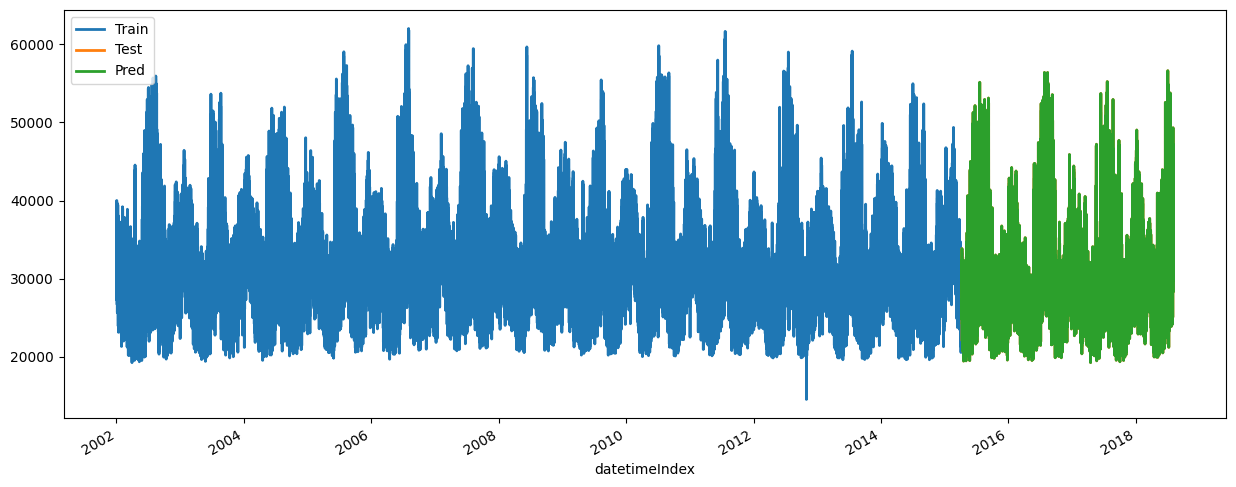

In [40]:
future=m.make_future_dataframe(periods=len(te_df), freq = 'H', include_history=False)
future = generate_regressor_feature(future)
forecast = m.predict(future)
forecast.index = forecast.ds
plot_and_validate(tr_df, te_df, forecast, 'y','yhat')

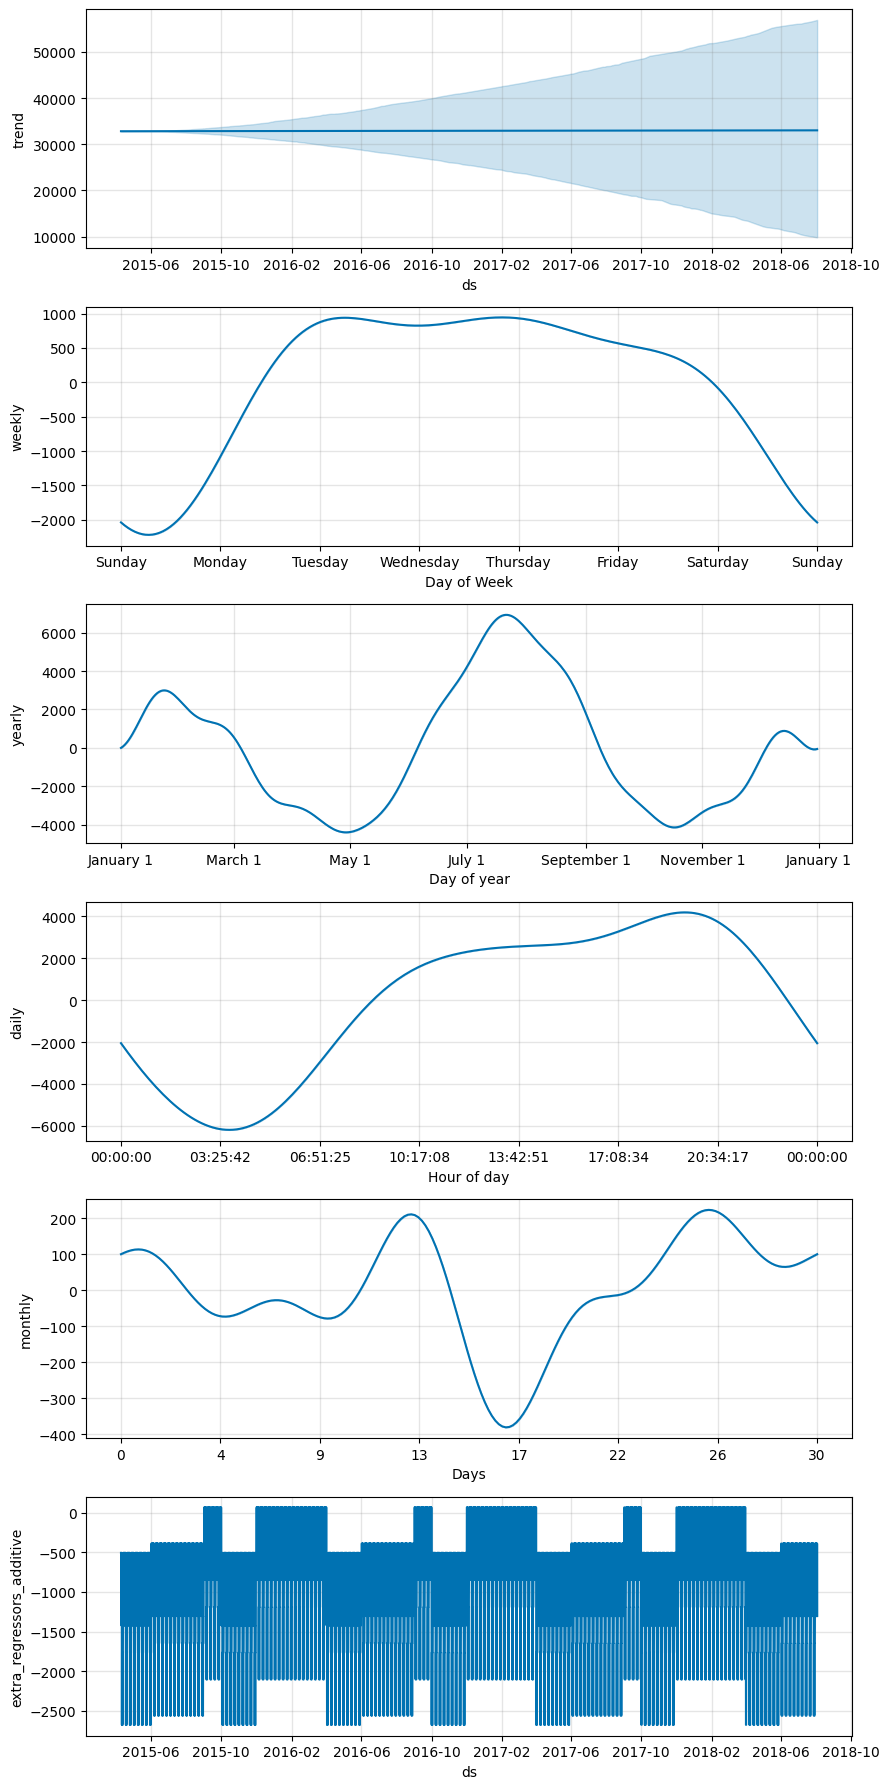

In [41]:
fig = m.plot_components(forecast)

FIND BEST PARAMS USING GRID SEACRH

In [44]:
tr_df, te_df, df = get_train_test_generic(for_prophet=True, freq=None)
tr_df = generate_regressor_feature(tr_df)
te_df = generate_regressor_feature(te_df)

import time
from sklearn.model_selection import ParameterGrid
from prophet.diagnostics import cross_validation, performance_metrics
start = time.time()

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1],
    'seasonality_prior_scale': [0.01, 1.0],
    'daily_seasonality':[True, False],
    'seasonality_mode': ['additive', 'multiplicative']
}

all_params = ParameterGrid(param_grid)
display(list(all_params))
mapes = []
rmses = []

for params in all_params:
    m = Prophet(yearly_seasonality=True,
            weekly_seasonality = True,
            daily_seasonality= params['daily_seasonality'],
            seasonality_mode = params['seasonality_mode'],
            changepoint_prior_scale = params['changepoint_prior_scale'],
            seasonality_prior_scale =  params['seasonality_prior_scale']
            )
    m.add_country_holidays(country_name= 'US')
    m.add_seasonality(name= 'monthly', period= 30.5, fourier_order=5)
    m.add_regressor('high_peak_month')
    m.add_regressor('mid_peak_month')
    m.add_regressor('low_peak_month')
    m.add_regressor('low_peak_week')
    m.add_regressor('low_peak_hour')
    m.fit(tr_df)

#df_cv = cross_validation(m, initial = '730 days', period = '180 days', horizon = '365 days') # or user cuttoff
cutoffs=pd.to_datetime(['2012-01-01', '2014-01-01'])
df_cv = cross_validation(m, cutoffs=cutoffs, horizon='365 days')
df_p = performance_metrics(df_cv, rolling_window = 5)
print("mape = {}".format(df_p['mape'].values[0]))
mapes.append(df_p['mape'].values[0])
rmses.append(df_p['rmse'].values[0])
print("time taken after {} = {}".format(params, time.time()- start))

# best params
tuning_hasil = pd.DataFrame(all_params)
tuning_hasil['mape'] = mapes
tuning_hasil['rmse'] = rmses
print(tuning_results)

best_params = all_params(np.argmin(mapes))
print(best_params)
print("total_time= {}".format(time.time()- start))
display(tuning_hasil)
print(best_params)

[{'changepoint_prior_scale': 0.001,
  'daily_seasonality': True,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': True,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': True,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': True,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': False,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': False,
  'seasonality_mode': 'additive',
  'seasonality_prior_scale': 1.0},
 {'changepoint_prior_scale': 0.001,
  'daily_seasonality': False,
  'seasonality_mode': 'multiplicative',
  'seasonality_prior_scale': 0.01},
 {'changepoint_prior_scale': 0.001,
 

14:51:12 - cmdstanpy - INFO - Chain [1] start processing
14:51:27 - cmdstanpy - INFO - Chain [1] done processing
14:51:34 - cmdstanpy - INFO - Chain [1] start processing
14:51:50 - cmdstanpy - INFO - Chain [1] done processing
14:51:57 - cmdstanpy - INFO - Chain [1] start processing
14:52:09 - cmdstanpy - INFO - Chain [1] done processing
14:52:17 - cmdstanpy - INFO - Chain [1] start processing
14:52:31 - cmdstanpy - INFO - Chain [1] done processing
14:52:37 - cmdstanpy - INFO - Chain [1] start processing
14:52:50 - cmdstanpy - INFO - Chain [1] done processing
14:52:56 - cmdstanpy - INFO - Chain [1] start processing
14:53:08 - cmdstanpy - INFO - Chain [1] done processing
14:53:14 - cmdstanpy - INFO - Chain [1] start processing
14:53:31 - cmdstanpy - INFO - Chain [1] done processing
14:53:37 - cmdstanpy - INFO - Chain [1] start processing
14:53:50 - cmdstanpy - INFO - Chain [1] done processing
14:53:58 - cmdstanpy - INFO - Chain [1] start processing
14:55:24 - cmdstanpy - INFO - Chain [1]

mape = 0.09640925874901278
time taken after {'changepoint_prior_scale': 0.1, 'daily_seasonality': False, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0} = 1865.6926727294922


ValueError: Length of values (1) does not match length of index (24)

In [ ]:
m = Prophet(yearly_seasonality=True,
            weekly_seasonality = True,
            daily_seasonality= params['daily_seasonality'],
            seasonality_mode = params['seasonality_mode'],
            changepoint_prior_scale = params['changepoint_prior_scale'],
            seasonality_prior_scale = Bestparams['seasonality_prior_scale']
            )
m.add_country_holidays(country_name= 'US')
m.add_seasonality(name= 'monthly', period= 30.5, fourier_order=5)
m.add_regressor('high_peak_month')
m.add_regressor('mid_peak_month')
m.add_regressor('low_peak_month')
m.add_regressor('low_peak_week')
m.add_regressor('low_peak_hour')
m.fit(tr_df)
future=m.make_future_dataframe(periods=len(te_df), freq = 'H', include_history=False)
future = generate_regressor_feature(future)
forecast = m.predict(future)
forecast.index = forecast.ds
plot_and_validate(tr_df, te_df, forecast, 'y','yhat')


ERROR ANALYSIS

In [45]:
display(tr_df)
display(te_df)
merged= te_df.merge(forecast,left_index=True, right_index = True)
display(merged[['ds_x','y','yhat']])


ds        y  high_peak_month  \
datetimeIndex                                                       
2002-01-01 01:00:00 2002-01-01 01:00:00  30393.0                0   
2002-01-01 02:00:00 2002-01-01 02:00:00  29265.0                0   
2002-01-01 03:00:00 2002-01-01 03:00:00  28357.0                0   
2002-01-01 04:00:00 2002-01-01 04:00:00  27899.0                0   
2002-01-01 05:00:00 2002-01-01 05:00:00  28057.0                0   
...                                 ...      ...              ...   
2015-04-09 10:00:00 2015-04-09 10:00:00  33082.0                0   
2015-04-09 11:00:00 2015-04-09 11:00:00  33285.0                0   
2015-04-09 12:00:00 2015-04-09 12:00:00  33148.0                0   
2015-04-09 13:00:00 2015-04-09 13:00:00  32809.0                0   
2015-04-09 14:00:00 2015-04-09 14:00:00  32613.0                0   

                     mid_peak_month  low_peak_month  low_peak_week  \
datetimeIndex                                                        
2002-01-01 01:00:00            True           False              0   
2002-01-01 02:00:00            True           False              0   
2002-01-01 03:00:00            True           False              0   
2002-01-01 04:00:00            True           False              0   
2002-01-01 05:00:00            True           False              0   
...                             ...             ...            ...   
2015-04-09 10:00:00           False            True              0   
2015-04-09 11:00:00           False            True              0   
2015-04-09 12:00:00           False            True              0   
2015-04-09 13:00:00           False            True              0   
2015-04-09 14:00:00           False            True              0   

                     low_peak_hour  
datetimeIndex                       
2002-01-01 01:00:00              1  
2002-01-01 02:00:00              1  
2002-01-01 03:00:00              1  
2002-01-01 04:00:00              1  
2002-01-01 05:00:00              1  
...                            ...  
2015-04-09 10:00:00              0  
2015-04-09 11:00:00              0  
2015-04-09 12:00:00              0  
2015-04-09 13:00:00              0  
2015-04-09 14:00:00              0  

[116292 rows x 7 columns]

ds        y  high_peak_month  \
datetimeIndex                                                       
2015-04-09 15:00:00 2015-04-09 15:00:00  32204.0                0   
2015-04-09 16:00:00 2015-04-09 16:00:00  32049.0                0   
2015-04-09 17:00:00 2015-04-09 17:00:00  32209.0                0   
2015-04-09 18:00:00 2015-04-09 18:00:00  32707.0                0   
2015-04-09 19:00:00 2015-04-09 19:00:00  33012.0                0   
...                                 ...      ...              ...   
2018-08-02 20:00:00 2018-08-02 20:00:00  44057.0                1   
2018-08-02 21:00:00 2018-08-02 21:00:00  43256.0                1   
2018-08-02 22:00:00 2018-08-02 22:00:00  41552.0                1   
2018-08-02 23:00:00 2018-08-02 23:00:00  38500.0                1   
2018-08-03 00:00:00 2018-08-03 00:00:00  35486.0                1   

                     mid_peak_month  low_peak_month  low_peak_week  \
datetimeIndex                                                        
2015-04-09 15:00:00           False            True              0   
2015-04-09 16:00:00           False            True              0   
2015-04-09 17:00:00           False            True              0   
2015-04-09 18:00:00           False            True              0   
2015-04-09 19:00:00           False            True              0   
...                             ...             ...            ...   
2018-08-02 20:00:00           False           False              0   
2018-08-02 21:00:00           False           False              0   
2018-08-02 22:00:00           False           False              0   
2018-08-02 23:00:00           False           False              0   
2018-08-03 00:00:00           False           False              0   

                     low_peak_hour  
datetimeIndex                       
2015-04-09 15:00:00              0  
2015-04-09 16:00:00              0  
2015-04-09 17:00:00              0  
2015-04-09 18:00:00              0  
2015-04-09 19:00:00              0  
...                            ...  
2018-08-02 20:00:00              0  
2018-08-02 21:00:00              0  
2018-08-02 22:00:00              0  
2018-08-02 23:00:00              0  
2018-08-03 00:00:00              1  

[29074 rows x 7 columns]

ds_x        y          yhat
2015-04-09 15:00:00 2015-04-09 15:00:00  32204.0  32281.887921
2015-04-09 16:00:00 2015-04-09 16:00:00  32049.0  32435.363563
2015-04-09 17:00:00 2015-04-09 17:00:00  32209.0  32788.097839
2015-04-09 18:00:00 2015-04-09 18:00:00  32707.0  33286.466892
2015-04-09 19:00:00 2015-04-09 19:00:00  33012.0  33677.507317
...                                 ...      ...           ...
2018-08-02 20:00:00 2018-08-02 20:00:00  44057.0  43416.946423
2018-08-02 21:00:00 2018-08-02 21:00:00  43256.0  42636.478192
2018-08-02 22:00:00 2018-08-02 22:00:00  41552.0  41151.230012
2018-08-02 23:00:00 2018-08-02 23:00:00  38500.0  39220.931973
2018-08-03 00:00:00 2018-08-03 00:00:00  35486.0  36293.900617

[29074 rows x 3 columns]

<Axes: >

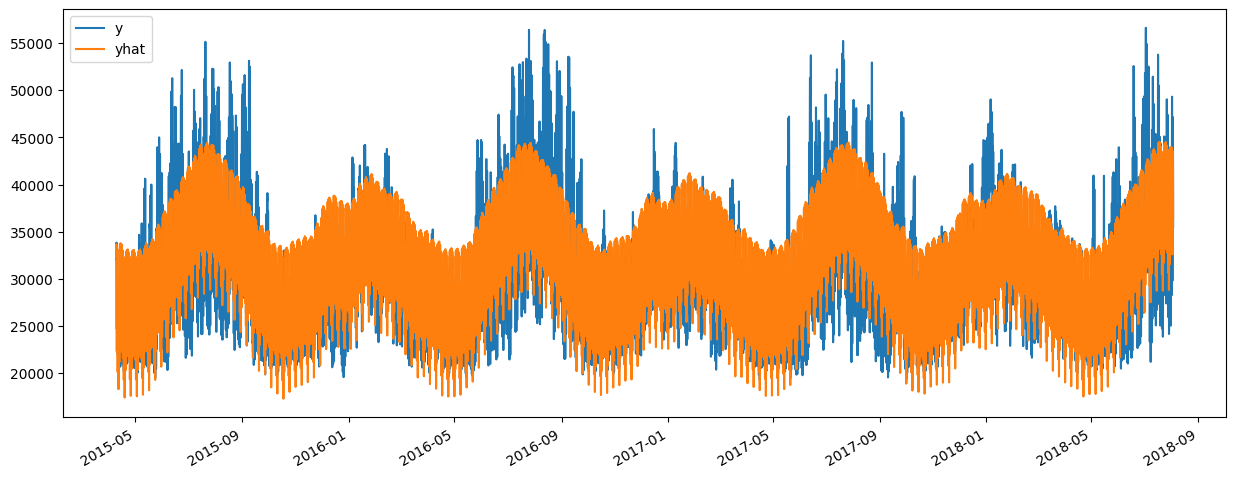

In [48]:
merged[['y','yhat']].plot()

<Axes: >

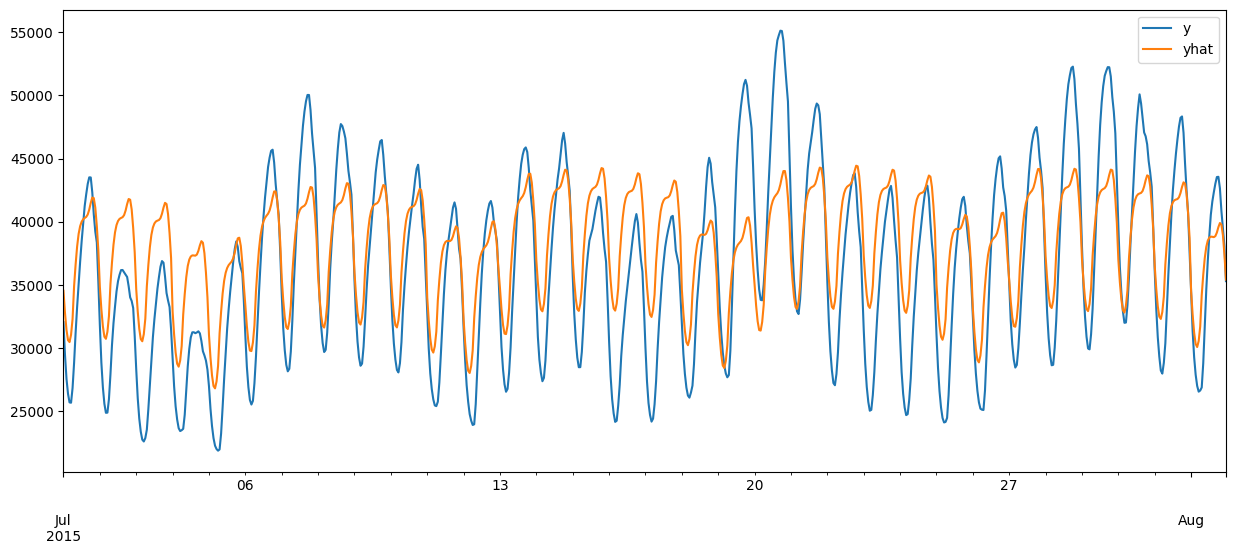

In [51]:
subjection = merged.loc['2015-07-01':'2015-08-01']
subjection[['y','yhat']].plot()

<Axes: >

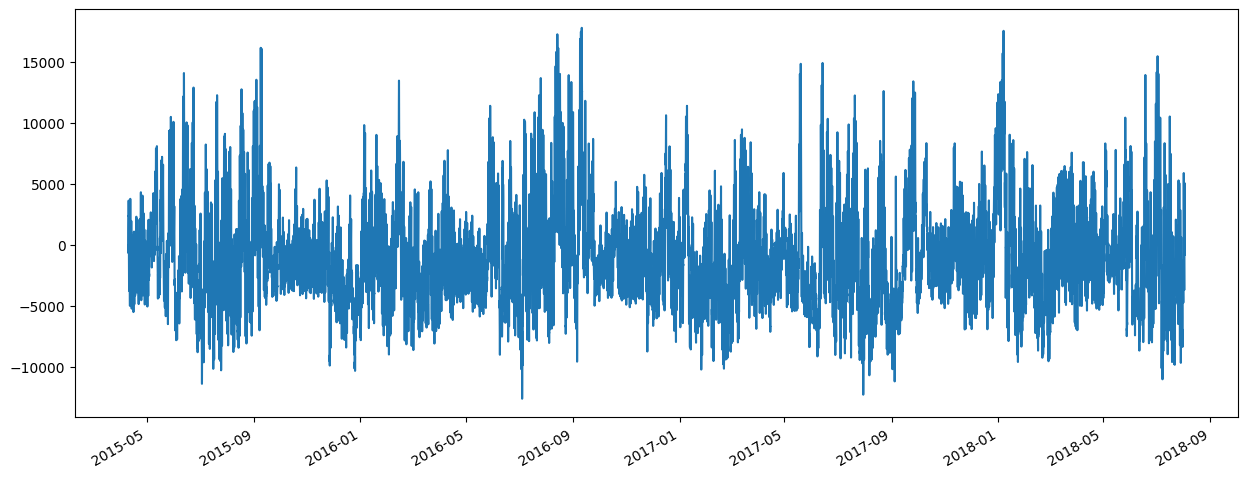

In [53]:
merged['residual']=merged['y'] - merged['yhat']
merged['residual'].plot()

In [55]:
merged['date']= merged.index.date
merged['year']= merged.index.year
merged['quarter']= merged.index.quarter
merged['month']= merged.index.month
merged['dom'] = merged.index.day
merged['dow']= merged.index.dayofweek
merged['doy']= merged.index.dayofyear
merged['weekday']= merged.index.day_name()
merged['hour']= merged.index.hour

Text(0.5, 1.0, 'Houry Boxplot PJME residual')

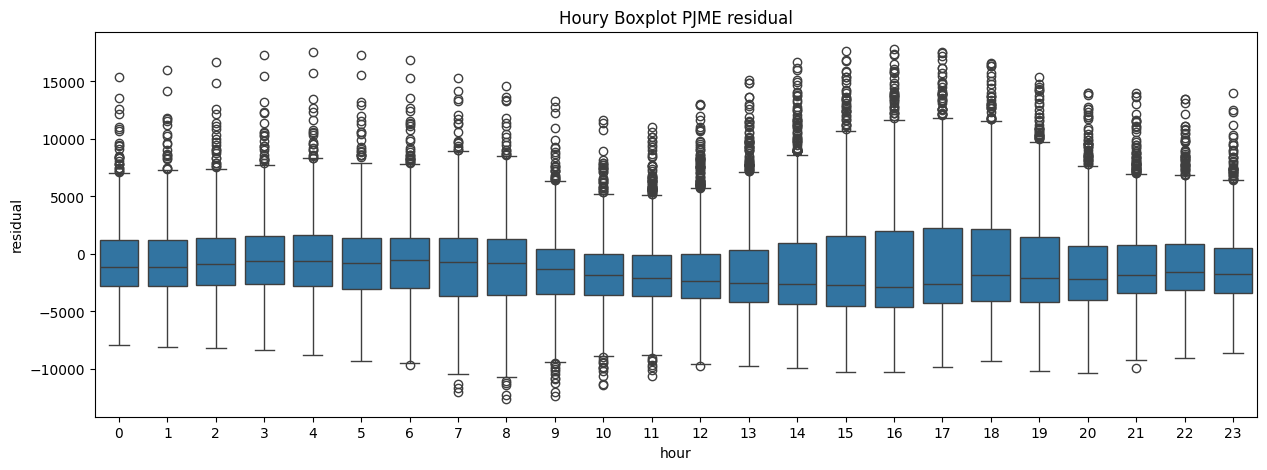

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x=merged.hour, y=merged.residual)
ax.set_title('Houry Boxplot PJME residual')

Text(0.5, 1.0, 'Houry Boxplot PJME residual')

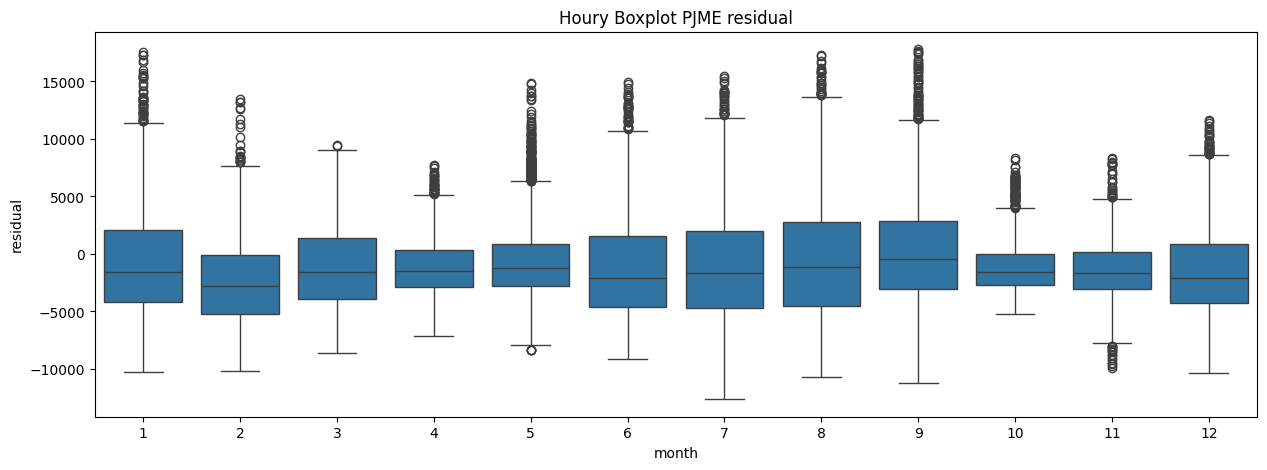

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x = merged.month, y = merged.residual)
ax.set_title('Houry Boxplot PJME residual')

<Axes: title={'center': 'PJME Daily Trends'}, xlabel='hour'>

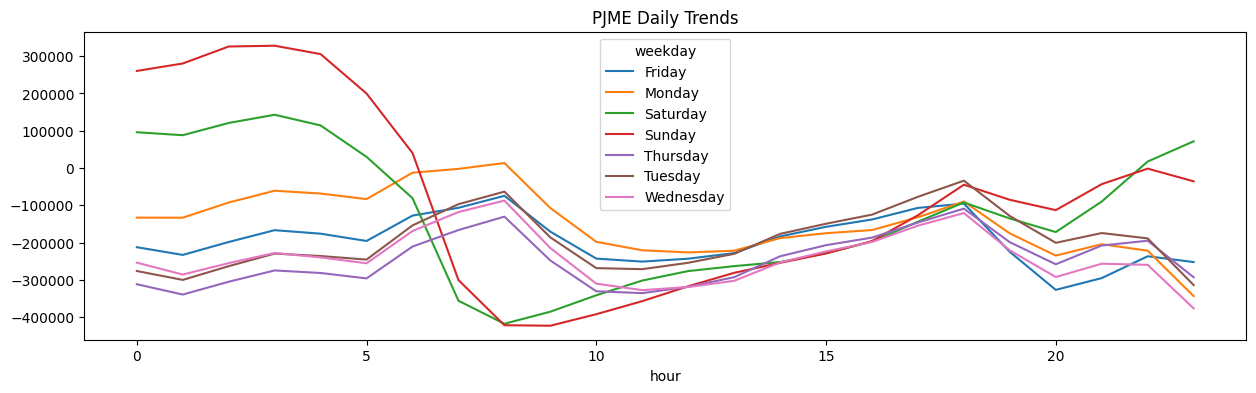

In [65]:
merged2 = merged.pivot_table(index=merged['hour'], columns = 'weekday', values = 'residual', aggfunc = 'sum')
merged2.head
merged2.plot(figsize=(15,4), title = 'PJME Daily Trends')

DAY LEVEL FORECASTING

ds         y
datetimeIndex                     
2002-01-01    2002-01-01  714857.0
2002-01-02    2002-01-02  822277.0
2002-01-03    2002-01-03  828285.0
2002-01-04    2002-01-04  809171.0
2002-01-05    2002-01-05  729723.0

15:45:45 - cmdstanpy - INFO - Chain [1] start processing
15:45:45 - cmdstanpy - INFO - Chain [1] done processing


ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 2015-04-10  748029.094783  606338.606243  780148.954812  748029.094783   
1 2015-04-11  748037.904658  541226.470331  713269.032593  748037.904658   
2 2015-04-12  748046.714532  524620.754915  694097.137909  748046.714532   
3 2015-04-13  748055.524406  601833.555986  769084.416193  748055.524406   
4 2015-04-14  748064.334280  618060.279886  784738.446209  748064.334280   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  748029.094783   -54291.743673         -54291.743673         -54291.743673   
1  748037.904658  -118413.220948        -118413.220948        -118413.220948   
2  748046.714532  -140340.959274        -140340.959274        -140340.959274   
3  748055.524406   -60689.970951         -60689.970951         -60689.970951   
4  748064.334280   -48112.729393         -48112.729393         -48112.729393   

         daily  ...        weekly  weekly_lower  weekly_upper        yearly  \
0  20288.95871  ...  14784.381362  14784.381362  14784.381362 -89365.083745   
1  20288.95871  ... -47334.981170 -47334.981170 -47334.981170 -91367.198489   
2  20288.95871  ... -67230.134906 -67230.134906 -67230.134906 -93399.783078   
3  20288.95871  ...  14461.277548  14461.277548  14461.277548 -95440.207209   
4  20288.95871  ...  29062.726400  29062.726400  29062.726400 -97464.414503   

   yearly_lower  yearly_upper  multiplicative_terms  \
0 -89365.083745 -89365.083745                   0.0   
1 -91367.198489 -91367.198489                   0.0   
2 -93399.783078 -93399.783078                   0.0   
3 -95440.207209 -95440.207209                   0.0   
4 -97464.414503 -97464.414503                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0  693737.351111  
1                         0.0                         0.0  629624.683709  
2                         0.0                         0.0  607705.755258  
3                         0.0                         0.0  687365.553455  
4                         0.0                         0.0  699951.604887  

[5 rows x 22 columns]

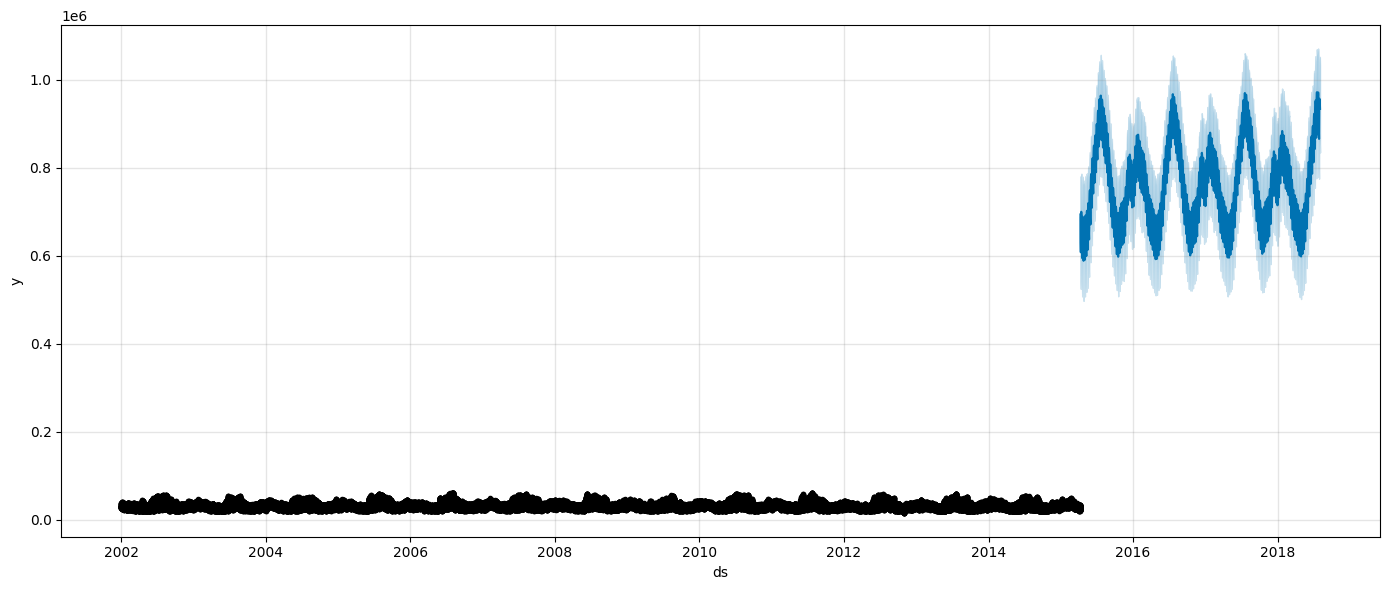

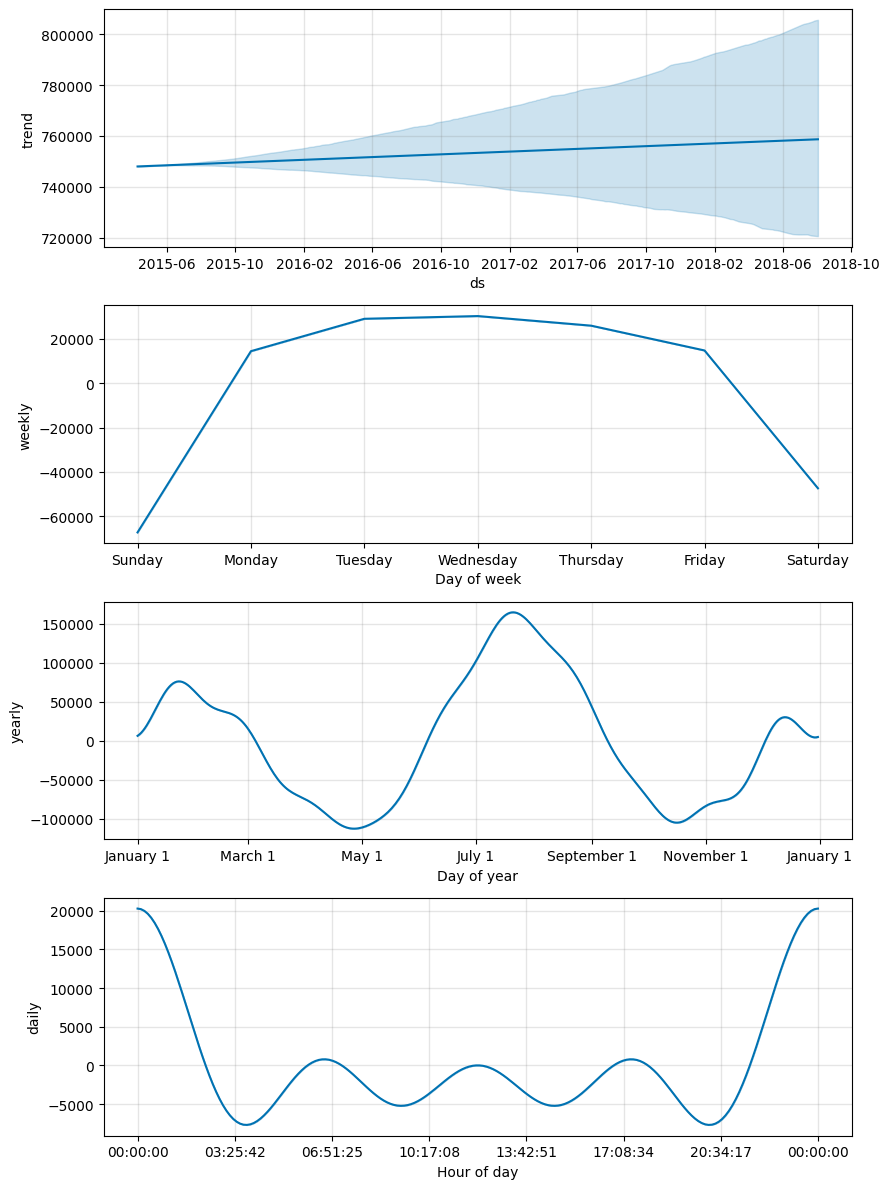

In [66]:
from prophet import Prophet 
tr_df, te_df, df = get_train_test_generic(for_prophet=True, freq ='1D')
display(tr_df.head())
model = Prophet(daily_seasonality = True, weekly_seasonality = True, yearly_seasonality = True)
model.fit(tr_df)
future = model.make_future_dataframe(periods = len(te_df), include_history = False)
forecast= model.predict(future)
fig = m.plot(forecast, figsize =(14,6))
display(forecast.head())
model.plot_components(forecast);

mse=7276958440.576, rmse=85305.090, mae=66881.383, mape=0.110, smape =0.088


/home/veinmahzy/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


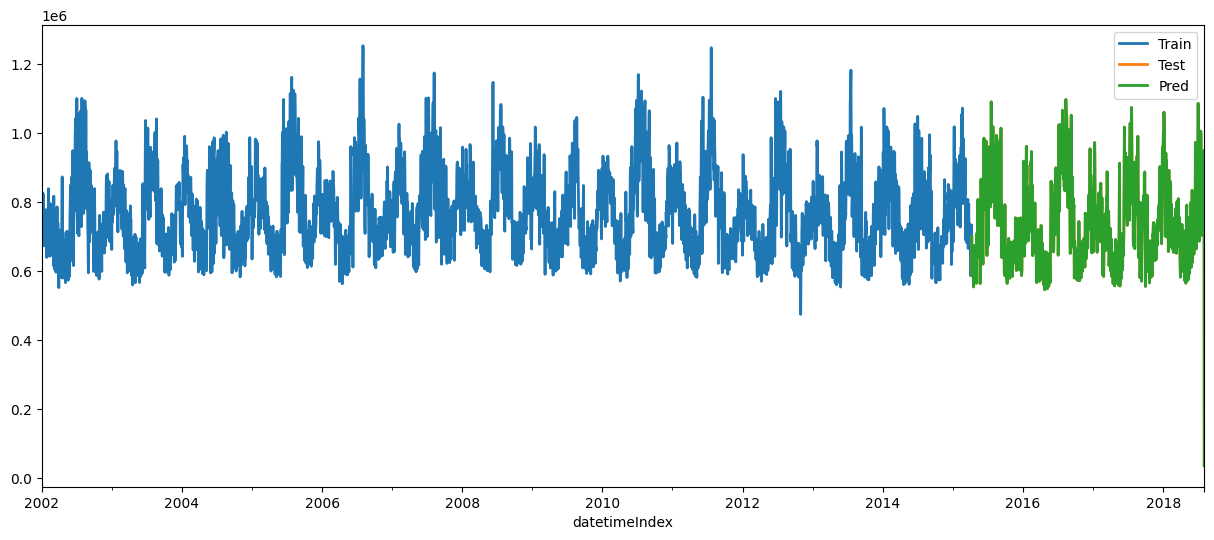

In [68]:
forecast.index = forecast.ds
plot_and_validate(tr_df, te_df, forecast, 'y', 'yhat')